### Loading Code

In [0]:
import numpy as np
import pandas as pd

In [0]:
data = pd.read_csv('lungC.csv')
label = pd.read_csv('expr_all_labels.csv')
genes = pd.read_csv('gene_set.csv')

In [0]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

In [0]:
train_set, valid_set = train_test_split(train_set, test_size=0.1, random_state=42)

In [0]:
train_set.shape

(811, 20506)

In [0]:
valid_set.shape

(91, 20506)

In [0]:
test_set.shape

(226, 20506)

In [0]:
train_set.head()

,Unnamed: 0,sample_IDs,labels,fromTissu,sample_orig_IDs,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,AAAS,AACSL,AACS,AADACL2,AADACL3,AADACL4,AADAC,AADAT,AAGAB,AAK1,AAMP,AANAT,AARS2,AARSD1,AARS,AASDHPPT,AASDH,AASS,AATF,AATK,ABAT,ABCA10,ABCA11P,ABCA12,ABCA13,ABCA17P,...,ZRANB1,ZRANB2,ZRANB3,ZRSR2,ZSCAN10,ZSCAN12P1,ZSCAN12,ZSCAN16,ZSCAN18,ZSCAN1,ZSCAN20,ZSCAN21,ZSCAN22,ZSCAN23,ZSCAN29,ZSCAN2,ZSCAN4,ZSCAN5A,ZSCAN5B,ZSWIM1,ZSWIM2,ZSWIM3,ZSWIM4,ZSWIM5,ZSWIM6,ZSWIM7,ZUFSP,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,tAKR
1102,6629,TCGA-NC-A5HF-01,17,LUSC,TCGA-NC-A5HF-01A-11R-A26W-07,184.1355,0.0000,36.3727,22.5710,209.2676,3030.3189,1061.2855,1.4948,1.4948,1242.1525,43.8465,1897.8575,0.0000,0.0000,0.4983,35.3762,43.3483,712.0080,961.6343,3851.0214,0.4983,686.0688,281.5147,4898.3558,710.9517,156.9507,965.1221,870.4534,103.6373,109.1181,30.8919,70.3338,410.0648,714.9975,28.4006,...,1237.1699,1685.3463,81.7140,272.0478,0.4983,8.7394,148.9786,49.3224,776.7813,0.0000,114.1006,305.5556,156.9507,1.4948,392.6258,111.1111,7.4738,118.5850,1.9930,363.2287,0.000,105.1320,593.4230,159.4420,314.3996,140.7723,191.3303,564.0259,339.1530,1059.7907,33.3832,228.6996,1344.2950,28.8989,468.3607,6109.6163,825.1121,739.9103,194.3199,0.9965
530,6057,TCGA-J2-8192-01,16,LUAD,TCGA-J2-8192-01A-11R-2241-07,60.5462,0.0000,2.2525,80.9723,43.1722,26093.9165,751.1966,2.2525,1.8771,501.5486,0.7508,536.8372,0.0000,0.0000,0.0000,15.0164,79.5870,775.5983,1077.4284,1901.0793,0.3754,354.3576,407.3205,3417.3627,1006.4758,410.6992,792.8672,1009.1037,46.9263,600.2816,7.8836,91.2135,447.4894,269.5448,29.6574,...,754.5753,1224.9348,58.5641,266.1661,2.6279,27.5251,177.1938,104.6945,879.5870,0.3754,63.0690,172.5650,102.1117,37.9165,342.3745,199.3430,15.3918,21.3984,0.7508,212.8578,0.000,116.3773,672.7358,445.2370,629.9390,245.9728,126.1380,434.3501,272.8297,233.8808,91.2248,607.4144,986.5791,18.3951,1474.2374,4024.4017,1164.8991,815.3918,72.4542,0.0000
516,6043,TCGA-97-A4LX-01,16,LUAD,TCGA-97-A4LX-01A-11R-A24X-07,156.0802,0.0000,0.0000,90.4808,0.8798,27417.3606,247.2297,1.7596,0.0000,690.6594,6.1587,850.3469,0.0000,0.0000,0.4399,37.8323,43.5511,607.9562,1107.6945,1614.4713,3.0794,560.7670,337.4113,2918.8057,832.7505,428.0329,579.3620,1292.8968,100.7395,434.6315,19.3561,87.8237,141.6512,25.5148,121.8552,...,580.2419,1608.5105,45.3108,222.1548,0.0000,18.6566,128.8938,108.2180,941.8482,0.4399,72.1453,123.9360,92.8211,25.0749,323.7741,160.1274,3.5193,47.0704,0.4399,292.5404,0.000,106.0184,511.1759,201.0391,530.0921,155.3324,128.4538,362.9261,219.9156,377.0032,60.7076,366.0055,1307.8537,77.8641,1039.9483,6665.5229,1454.7838,752.6868,11.8776,0.0000
667,6194,TCGA-33-4587-11,33,LUSC,TCGA-33-4587-11A-01R-2125-07,287.3225,0.0000,0.9281,94.1624,0.0000,68827.7865,638.9791,12.5290,0.0000,542.4594,13.4571,538.2831,3.2483,0.0000,0.0000,526.2181,140.6032,1036.1949,509.0487,2035.2668,0.4640,280.6775,381.9026,2020.4176,762.4130,371.6937,302.0882,656.1485,420.5290,211.1369,84.9745,150.2413,0.0000,37.5870,3.7123,...,761.9490,1477.7355,24.5940,316.4733,1.3921,14.5429,253.3643,133.6102,929.0023,3.2483,39.4432,176.8260,74.2459,28.3063,292.8074,145.2436,6.0325,75.1740,1.8561,229.2343,0.000,216.2413,192.1114,127.1462,342.4594,669.8840,246.8677,290.4872,156.3155,148.0278,40.8353,265.4292,777.7262,3.2483,926.6821,4579.5824,878.8863,634.8028,103.4803,0.0000
606,6133,TCGA-21-5782-01,17,LUSC,TCGA-21-5782-01A-01R-1635-07,155.0562,1.1236,13.4831,198.5281,1050.5618,9403.2921,1151.6854,8.9888,6.7416,1142.6966,13.4831,1384.2697,12.3596,30.3371,8.9888,311.2360,39.3258,1355.0562,1052.8090,3691.0112,3.3708,988.5169,613.4831,7869.6629,719.1011,321.3483,278.6517,2089.8876,48.3146,86.5169,13.4831,117.4045,942.6966,998.8764,19.1011,...,1270.7865,617.8315,17.9775,223.5955,4.4944,53.9551,233.7079,83.0899,280.8989,5.6180,106.7416,371.5506,226.9663,15.7303,511.2360,193.2584,12.3596,135.9551,16.8539,342.6966,11.236,119.1011,569.6629,88.7640,420.2247,111.3371,175.2809,607.8652,475.9888,1812.359

In [0]:
train_set.describe()

,Unnamed: 0,labels,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,AAAS,AACSL,AACS,AADACL2,AADACL3,AADACL4,AADAC,AADAT,AAGAB,AAK1,AAMP,AANAT,AARS2,AARSD1,AARS,AASDHPPT,AASDH,AASS,AATF,AATK,ABAT,ABCA10,ABCA11P,ABCA12,ABCA13,ABCA17P,ABCA1,ABCA2,ABCA3,...,ZRANB1,ZRANB2,ZRANB3,ZRSR2,ZSCAN10,ZSCAN12P1,ZSCAN12,ZSCAN16,ZSCAN18,ZSCAN1,ZSCAN20,ZSCAN21,ZSCAN22,ZSCAN23,ZSCAN29,ZSCAN2,ZSCAN4,ZSCAN5A,ZSCAN5B,ZSWIM1,ZSWIM2,ZSWIM3,ZSWIM4,ZSWIM5,ZSWIM6,ZSWIM7,ZUFSP,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,tAKR
count,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,...,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.00000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000
mean,6098.958076,18.033292,134.964550,2.663757,9.117174,95.005209,822.114885,24603.250611,860.064634,7.334247,0.582615,763.942054,9.003812,957.391960,12.533774,0.309119,0.198975,189.743078,108.998993,1176.503993,1064.554385,2524.438618,0.840298,505.700613,508.915304,3723.984945,920.297125,271.416018,600.030714,1385.616798,236.297889,329.163488,23.341172,92.537132,364.677946,699.867406,16.829440,1391.170343,1031.498371,5409.997858,...,819.870834,1318.505454,60.375741,214.400506,1.628403,34.474679,185.663338,118.421261,764.438202,3.129061,58.509983,200.754900,113.713212,29.198420,460.803400,192.718857,6.833038,86.536474,2.227793,279.138297,0.120455,118.334027,518.298219,174.531523,474.660201,247.592488,170.879199,485.674523,469.896601,782.514336,49.042344,366.45302,1241.244570,54.559051,791.246080,4581.061747,1091.521602,732.582596,118.311309,0.550687
std,325.432993,4.804332,189.622174,20.691684,48.798840,47.786609,2386.112347,30936.974642,968.196627,112.188496,2.206112,261.595413,63.519631,555.075965,62.823948,2.440743,1.412976,589.760856,96.685236,457.325199,477.510542,753.549100,1.338873,237.932044,199.383207,1718.813831,375.408304,129.928457,673.702594,514.909268,347.004410,400.037348,47.409112,61.386256,616.547403,1096.876928,45.913952,882.876727,645.377751,7920.643391,...,238.222028,508.710554,38.393021,97.434168,9.604727,31.985032,93.534306,76.151947,496.339572,7.271020,26.646403,100.460146,44.201716,28.129528,160.779676,95.925883,18.970794,58.978710,5.252376,98.254712,0.858981,51.178244,286.446832,148.753602,207.917127,127.886861,61.162735,216.210387,275.814551,570.287155,21.150934,149.01445,458.125781,74.464935,257.559635,2277.255395,459.759279,305.363410,255.225415,2.592502
min,5527.000000,16.000000,2.396600,0.000000,0.000000,11.670600,0.000000,576.822200,26.890300,0.000000,0.000000,151.590800,0.000000,173.516000,0.000000,0.000000,0.000000,0.000000,1.801000,452.597200,122.321000,866.733500,0.000000,56.592400,113.542500,946.475400,271.734200,55.607900,18.663500,259.170400,1.002000,12.009600,0.000000,2.445700,0.000000,0.000000,0.000000,120.156200,16.255300,8.788200,...,206.482000,441.890500,3.123000,42.211100,0.000000,0.805300,27.277900,9.634100,15.051200,0.000000,10.836800,38.524200,35.434100,0.000000,98.735700,19.014100,0.000000,13.116800,0.000000,57.194500,0.000000,18.491500,57.380800,0.000000,89.041100,65.251400,50.028100,117.591200,96.045200,32.986100,4.214300,34.09940,314.870600,0.000000,188.550800,446.043200,162.310000,219.603600,0.400300,0.000000
25%,5811.500000,16.000000,48.785250,0.000000,0.000000,61.391750,0.746850,

In [0]:
data.shape

(1128, 20506)

In [0]:
data.head()

,Unnamed: 0,sample_IDs,labels,fromTissu,sample_orig_IDs,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,AAAS,AACSL,AACS,AADACL2,AADACL3,AADACL4,AADAC,AADAT,AAGAB,AAK1,AAMP,AANAT,AARS2,AARSD1,AARS,AASDHPPT,AASDH,AASS,AATF,AATK,ABAT,ABCA10,ABCA11P,ABCA12,ABCA13,ABCA17P,...,ZRANB1,ZRANB2,ZRANB3,ZRSR2,ZSCAN10,ZSCAN12P1,ZSCAN12,ZSCAN16,ZSCAN18,ZSCAN1,ZSCAN20,ZSCAN21,ZSCAN22,ZSCAN23,ZSCAN29,ZSCAN2,ZSCAN4,ZSCAN5A,ZSCAN5B,ZSWIM1,ZSWIM2,ZSWIM3,ZSWIM4,ZSWIM5,ZSWIM6,ZSWIM7,ZUFSP,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,tAKR
0,5527,TCGA-05-4244-01,16,LUAD,TCGA-05-4244-01A-01R-1107-07,26.0302,0.000,1.7454,135.5022,0.3491,9844.7858,130.9015,1.0472,0.0000,651.0167,0.6981,803.5605,0.6981,0.0,0.000,3.4907,53.0587,988.2189,1038.1360,1915.3504,0.0000,516.9282,472.2925,3054.7168,465.6602,370.3639,270.5297,1837.1586,66.3234,431.8003,8.7268,41.9094,484.1609,311.3710,9.7740,...,523.6059,1640.3735,24.7840,148.3550,0.3491,22.7629,73.6539,193.7342,125.6654,1.7454,83.7769,176.5355,145.5624,4.8870,400.0349,154.9873,1.7454,29.3219,0.3491,192.3379,0.3491,130.2033,850.3360,162.6669,842.6564,220.2635,152.1948,179.7714,221.1642,517.6717,39.7940,292.5212,959.2460,0.6981,1088.0531,2837.9440,871.2802,575.2683,6.6323,0.0
1,5528,TCGA-05-4249-01,16,LUAD,TCGA-05-4249-01A-01R-1107-07,120.1349,0.322,1.6098,89.0629,1.6098,25712.6617,578.5562,0.6439,0.3220,604.3128,0.0000,999.9976,0.0000,0.0,0.322,266.9021,185.4471,904.3764,839.6631,2238.8871,0.3220,319.3135,500.6427,2826.7800,966.5141,226.3356,372.8259,1493.5572,168.4284,478.7496,6.7611,122.3081,140.3731,357.6939,3.8635,...,1000.9635,1288.2680,67.2890,166.7736,0.0000,21.5808,221.1843,124.5715,679.6506,0.9659,74.3720,105.2477,129.4266,7.0830,430.4561,472.6325,4.8294,134.8999,5.7952,259.1752,0.0000,231.1649,564.0682,456.8566,481.3253,186.9860,201.8669,478.7496,198.5893,287.5074,62.1376,493.5597,1179.3275,20.2833,787.5061,2351.2500,1138.1170,690.2752,179.9738,0.0
2,5529,TCGA-05-4250-01,16,LUAD,TCGA-05-4250-01A-01R-1107-07,50.8597,0.000,0.0000,151.1332,0.0000,16943.6359,356.4619,0.9948,1.3264,588.5766,0.6632,754.0413,0.0000,0.0,0.000,26.1958,81.9033,1148.3047,571.6654,2808.9198,0.6632,411.8246,625.7150,3553.6765,897.9524,233.1095,198.9555,2418.9671,37.8015,91.8511,2.3211,146.8988,778.2475,22.2167,0.6632,...,522.9213,1201.2368,73.9451,155.8485,0.0000,48.8336,201.6082,100.1277,110.4203,0.0000,42.7754,172.0633,76.5979,33.1592,300.4228,158.5012,0.0000,23.5431,0.3316,260.3001,0.3316,183.7022,419.4645,113.7362,362.0990,143.5033,137.9425,485.1198,520.8986,1046.8374,60.0182,365.4149,843.9028,26.5274,475.1720,5437.4534,1170.5214,532.8691,6.3003,0.0
3,5530,TCGA-05-4382-01,16,LUAD,TCGA-05-4382-01A-01R-1206-07,145.9037,0.000,0.0000,112.0685,4.7861,23326.2727,554.4677,2.1537,1.4358,608.3112,2.6323,1079.9796,0.0000,0.0,0.000,3.5896,46.6643,1005.5560,834.6929,2470.0975,0.7179,409.1790,456.3530,4093.0582,748.3041,218.9633,221.8349,1504.7445,53.6041,242.1758,4.5468,35.7664,180.6746,424.0470,94.5251,...,674.8377,1092.5335,37.3314,189.7682,5.7433,25.6079,199.1011,217.2882,664.5476,16.2727,85.6709,202.9730,92.6107,3.8289,326.8895,393.4160,1.4358,53.1255,2.6323,255.3375,0.0000,148.8472,862.6915,355.1274,408.7315,221.4616,153.1547,486.2660,429.6299,753.0902,40.4424,346.7517,946.6872,64.8514,908.1593,6770.1537,1169.2401,663.8297,35.1777,0.0
4,5531,TCGA-05-4384-01,16,LUAD,TCGA-05-4384-01A-01R-1755-07,127.3671,0.000,0.0000,87.5748,0.0000,48314.5571,152.7184,1.8326,0.0000,665.8522,3.6652,709.8351,0.0000,0.0,0.000,34.8198,100.7941,1103.8485,1042.7611,2535.1252,0.0000,401.9548,403.7874,1674.4044,960.8308,246.7929,999.3891,990.8369,595.7605,714.7221,10.9957,106.8357,185.0947,140.5009,7.9414,...,833.2315,1548.9004,65.3635,169.8228,0.0000,15.1374,164.3250,157.5870,346.3653,0.6109,72.6940,157.7886,125.8400,24.4349,656.0782,311.5455,0.0000,43.9829,0.0000,274.2822,0.0000,83.6897,259.0104,436.7746,607.2083,334.9969,169.8228,351.2523,258.3018,153.9401,80.0244,563.2254,1320.7086,7.9414,778.8638,3341.4783,1737.3244,723.2743,378

In [0]:
data = data.drop(labels={'sample_IDs', 'fromTissu', 'sample_orig_IDs'}, axis=1)

In [0]:
train_set1 = train_set.drop(labels={'sample_IDs', 'fromTissu', 'sample_orig_IDs'}, axis=1)

In [0]:
train_set2 = train_set1.drop(labels={'Unnamed: 0', 'labels'}, axis=1)

In [0]:
gene_set = data.drop(labels={'sample_IDs', 'fromTissu', 'sample_orig_IDs','Unnamed: 0', 'labels'}, axis=1)

In [0]:
train_set1 = train_set1.astype('float')

In [0]:
train_set1.head()

,Unnamed: 0,labels,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,AAAS,AACSL,AACS,AADACL2,AADACL3,AADACL4,AADAC,AADAT,AAGAB,AAK1,AAMP,AANAT,AARS2,AARSD1,AARS,AASDHPPT,AASDH,AASS,AATF,AATK,ABAT,ABCA10,ABCA11P,ABCA12,ABCA13,ABCA17P,ABCA1,ABCA2,ABCA3,...,ZRANB1,ZRANB2,ZRANB3,ZRSR2,ZSCAN10,ZSCAN12P1,ZSCAN12,ZSCAN16,ZSCAN18,ZSCAN1,ZSCAN20,ZSCAN21,ZSCAN22,ZSCAN23,ZSCAN29,ZSCAN2,ZSCAN4,ZSCAN5A,ZSCAN5B,ZSWIM1,ZSWIM2,ZSWIM3,ZSWIM4,ZSWIM5,ZSWIM6,ZSWIM7,ZUFSP,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,tAKR
1102,6629.0,17.0,184.1355,0.0000,36.3727,22.5710,209.2676,3030.3189,1061.2855,1.4948,1.4948,1242.1525,43.8465,1897.8575,0.0000,0.0000,0.4983,35.3762,43.3483,712.0080,961.6343,3851.0214,0.4983,686.0688,281.5147,4898.3558,710.9517,156.9507,965.1221,870.4534,103.6373,109.1181,30.8919,70.3338,410.0648,714.9975,28.4006,1086.1983,1606.8759,1569.5067,...,1237.1699,1685.3463,81.7140,272.0478,0.4983,8.7394,148.9786,49.3224,776.7813,0.0000,114.1006,305.5556,156.9507,1.4948,392.6258,111.1111,7.4738,118.5850,1.9930,363.2287,0.000,105.1320,593.4230,159.4420,314.3996,140.7723,191.3303,564.0259,339.1530,1059.7907,33.3832,228.6996,1344.2950,28.8989,468.3607,6109.6163,825.1121,739.9103,194.3199,0.9965
530,6057.0,16.0,60.5462,0.0000,2.2525,80.9723,43.1722,26093.9165,751.1966,2.2525,1.8771,501.5486,0.7508,536.8372,0.0000,0.0000,0.0000,15.0164,79.5870,775.5983,1077.4284,1901.0793,0.3754,354.3576,407.3205,3417.3627,1006.4758,410.6992,792.8672,1009.1037,46.9263,600.2816,7.8836,91.2135,447.4894,269.5448,29.6574,957.2332,853.3083,2155.9831,...,754.5753,1224.9348,58.5641,266.1661,2.6279,27.5251,177.1938,104.6945,879.5870,0.3754,63.0690,172.5650,102.1117,37.9165,342.3745,199.3430,15.3918,21.3984,0.7508,212.8578,0.000,116.3773,672.7358,445.2370,629.9390,245.9728,126.1380,434.3501,272.8297,233.8808,91.2248,607.4144,986.5791,18.3951,1474.2374,4024.4017,1164.8991,815.3918,72.4542,0.0000
516,6043.0,16.0,156.0802,0.0000,0.0000,90.4808,0.8798,27417.3606,247.2297,1.7596,0.0000,690.6594,6.1587,850.3469,0.0000,0.0000,0.4399,37.8323,43.5511,607.9562,1107.6945,1614.4713,3.0794,560.7670,337.4113,2918.8057,832.7505,428.0329,579.3620,1292.8968,100.7395,434.6315,19.3561,87.8237,141.6512,25.5148,121.8552,1525.1563,1679.5780,5180.8252,...,580.2419,1608.5105,45.3108,222.1548,0.0000,18.6566,128.8938,108.2180,941.8482,0.4399,72.1453,123.9360,92.8211,25.0749,323.7741,160.1274,3.5193,47.0704,0.4399,292.5404,0.000,106.0184,511.1759,201.0391,530.0921,155.3324,128.4538,362.9261,219.9156,377.0032,60.7076,366.0055,1307.8537,77.8641,1039.9483,6665.5229,1454.7838,752.6868,11.8776,0.0000
667,6194.0,33.0,287.3225,0.0000,0.9281,94.1624,0.0000,68827.7865,638.9791,12.5290,0.0000,542.4594,13.4571,538.2831,3.2483,0.0000,0.0000,526.2181,140.6032,1036.1949,509.0487,2035.2668,0.4640,280.6775,381.9026,2020.4176,762.4130,371.6937,302.0882,656.1485,420.5290,211.1369,84.9745,150.2413,0.0000,37.5870,3.7123,918.7935,485.3828,12814.3852,...,761.9490,1477.7355,24.5940,316.4733,1.3921,14.5429,253.3643,133.6102,929.0023,3.2483,39.4432,176.8260,74.2459,28.3063,292.8074,145.2436,6.0325,75.1740,1.8561,229.2343,0.000,216.2413,192.1114,127.1462,342.4594,669.8840,246.8677,290.4872,156.3155,148.0278,40.8353,265.4292,777.7262,3.2483,926.6821,4579.5824,878.8863,634.8028,103.4803,0.0000
606,6133.0,17.0,155.0562,1.1236,13.4831,198.5281,1050.5618,9403.2921,1151.6854,8.9888,6.7416,1142.6966,13.4831,1384.2697,12.3596,30.3371,8.9888,311.2360,39.3258,1355.0562,1052.8090,3691.0112,3.3708,988.5169,613.4831,7869.6629,719.1011,321.3483,278.6517,2089.8876,48.3146,86.5169,13.4831,117.4045,942.6966,998.8764,19.1011,1119.1011,861.7978,574.1573,...,1270.7865,617.8315,17.9775,223.5955,4.4944,53.9551,233.7079,83.0899,280.8989,5.6180,106.7416,371.5506,226.9663,15.7303,511.2360,193.2584,12.3596,135.9551,16.8539,342.6966,11.236,119.1011,569.6629,88.7640,420.2247,111.3371,175.2809,607.8652,475.9888,1812.3596,42.6966,242.6966,1538.2022,37.0787,503.3708,5314.6067,776.4045,589.8876,19.1011,0.0000


### MAGIC

In [60]:
!pip install magic-impute

MAGIC, Markov Affinity-based Graph Imputation of Cells, denoises single-cell gene expression data
and generates denoised output per gene and entry

In [0]:
import magic
import pandas as pd
import matplotlib.pyplot as plt

Calculating MAGIC...
  Running MAGIC on 811 cells and 20503 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...


/usr/local/lib/python3.6/dist-packages/magic/magic.py:472: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  "Input matrix contains unexpressed genes. "


    Calculated PCA in 2.53 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.13 seconds.
    Calculating affinities...
    Calculated affinities in 0.12 seconds.
  Calculated graph and diffusion operator in 2.84 seconds.
  Calculating imputation...
Calculated MAGIC in 3.25 seconds.


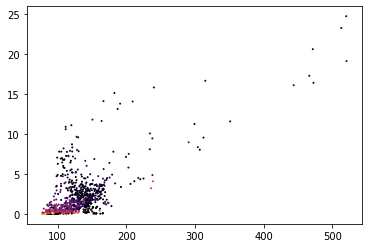

In [0]:
magic_operator = magic.MAGIC()
X_magic = magic_operator.fit_transform(train_set1, genes=['A1BG', 'A1CF', 'A2ML1'])
plt.scatter(X_magic['A1BG'], X_magic['A1CF'], c=X_magic['A2ML1'], s=1, cmap='inferno')
plt.show()
magic.plot.animate_magic(train_set1, gene_x='A1BG', gene_y='A1CF', gene_color='A2ML1', operator=magic_operator)

In [0]:
train_set1.columns

Index(['Unnamed: 0', 'labels', 'A1BG', 'A1CF', 'A2BP1', 'A2LD1', 'A2ML1',
       'A2M', 'A4GALT', 'A4GNT',
       ...
       'ZXDA', 'ZXDB', 'ZXDC', 'ZYG11A', 'ZYG11B', 'ZYX', 'ZZEF1', 'ZZZ3',
       'psiTPTE22', 'tAKR'],
      dtype='object', length=20503)

In [0]:
train_set2.columns

Index(['A1BG', 'A1CF', 'A2BP1', 'A2LD1', 'A2ML1', 'A2M', 'A4GALT', 'A4GNT',
       'AAA1', 'AAAS',
       ...
       'ZXDA', 'ZXDB', 'ZXDC', 'ZYG11A', 'ZYG11B', 'ZYX', 'ZZEF1', 'ZZZ3',
       'psiTPTE22', 'tAKR'],
      dtype='object', length=20501)

In [0]:
magic_operator = magic.MAGIC()
X_magic = magic_operator.fit_transform(genes, genes=genes.columns)

Calculating MAGIC...
  Running MAGIC on 1128 cells and 20502 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...


/usr/local/lib/python3.6/dist-packages/magic/magic.py:472: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  "Input matrix contains unexpressed genes. "


    Calculated PCA in 4.61 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.23 seconds.
    Calculating affinities...
    Calculated affinities in 0.20 seconds.
  Calculated graph and diffusion operator in 5.15 seconds.
  Running MAGIC with `solver='exact'` on 20502-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 1.78 seconds.
Calculated MAGIC in 24.18 seconds.


In [0]:
X_magic = X_magic.drop('Unnamed: 0', axis=1)
X_magic.head()

,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,AAAS,AACSL,AACS,AADACL2,AADACL3,AADACL4,AADAC,AADAT,AAGAB,AAK1,AAMP,AANAT,AARS2,AARSD1,AARS,AASDHPPT,AASDH,AASS,AATF,AATK,ABAT,ABCA10,ABCA11P,ABCA12,ABCA13,ABCA17P,ABCA1,ABCA2,ABCA3,ABCA4,ABCA5,...,ZRANB1,ZRANB2,ZRANB3,ZRSR2,ZSCAN10,ZSCAN12P1,ZSCAN12,ZSCAN16,ZSCAN18,ZSCAN1,ZSCAN20,ZSCAN21,ZSCAN22,ZSCAN23,ZSCAN29,ZSCAN2,ZSCAN4,ZSCAN5A,ZSCAN5B,ZSWIM1,ZSWIM2,ZSWIM3,ZSWIM4,ZSWIM5,ZSWIM6,ZSWIM7,ZUFSP,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,tAKR
0,125.451683,6.906817,14.048202,103.201459,22.310204,26445.210531,315.643942,4.205648,0.651220,658.906827,25.454430,879.688765,1.072612,0.036771,0.176936,128.439694,130.576270,998.747556,908.687025,2392.628783,0.851471,479.876402,506.087408,3231.465984,901.045498,277.853875,729.922049,1409.224375,332.437397,464.911675,16.515940,106.319486,279.185690,312.880853,19.292179,1314.791682,1236.467638,8241.419654,647.081109,277.949374,...,772.557508,1605.405745,47.933287,248.744310,0.971969,35.597562,190.851087,158.984135,870.373330,3.691518,61.688582,161.126955,127.343409,32.515794,456.954365,223.350345,15.427124,58.622675,1.394830,279.197870,0.195591,136.064615,627.639391,276.518553,531.467015,274.060798,141.419373,394.400172,289.222165,505.016900,50.027691,396.833097,1208.726551,44.714168,924.563564,3456.275583,1093.843867,692.829869,120.860608,0.145798
1,134.810971,3.491794,13.490615,104.715371,51.847136,25323.207453,401.274984,5.263368,0.745314,659.823394,7.085297,902.837863,1.621718,0.099050,0.213232,136.853864,127.807081,1012.749557,934.867871,2386.481946,0.734732,489.763570,520.681973,3334.631036,931.931392,275.216108,615.660920,1453.860487,234.662250,427.438841,15.482327,102.315792,323.417342,350.550948,22.180554,1269.305438,1173.447448,6141.314286,527.149461,280.279450,...,777.365791,1477.306540,50.192176,237.610620,1.812461,37.312622,179.488850,158.457963,858.000009,3.663877,65.151657,176.671043,125.674147,29.668906,440.064595,228.982493,12.604909,61.052503,1.427531,290.983503,0.162724,140.627167,664.563314,287.762878,511.419770,263.668872,147.924294,424.093219,317.176907,601.409579,50.823551,398.526060,1153.189767,70.978807,917.819742,3754.981274,1069.024709,723.817564,105.144465,0.121047
2,149.338211,3.697795,2.040986,104.749547,110.087288,16584.069933,524.535393,3.102835,0.397782,759.236445,5.956239,900.596129,1.519835,0.323105,0.115666,74.084356,94.093548,1180.301506,882.786324,2555.272962,0.945994,499.874269,552.269121,3767.670379,938.445955,269.759239,363.240822,1643.641435,168.320780,269.568062,11.674533,109.102384,282.048713,247.067428,22.436024,1329.981700,1005.432723,2900.242582,376.266505,205.612093,...,715.101192,1347.039543,59.149156,203.071283,2.126249,40.361590,164.606275,138.531052,811.384622,3.827007,64.380373,208.484903,107.199749,27.341730,399.852549,212.342774,6.946521,64.599504,1.387594,291.903556,0.136398,137.152477,631.968543,205.907171,496.987908,230.266118,157.658225,474.647972,445.046615,933.696372,42.694324,347.063040,1005.117940,83.429006,794.542161,4978.203078,942.769059,768.176339,88.650637,0.130107
3,165.932082,2.049541,2.811318,108.662337,384.948492,19894.781892,703.317239,2.389292,0.542668,715.268061,6.181655,852.852772,3.172887,0.621892,0.334832,73.413591,92.759516,1083.525168,1017.718039,2400.228919,1.069870,481.816059,493.856875,3522.196612,916.990897,243.791306,422.351788,1470.957558,134.019992,286.282649,13.368600,92.243305,287.037323,410.447436,20.459566,1367.968709,1146.366988,2838.897557,398.019528,257.813777,...,738.791842,1290.733764,53.052255,218.520978,2.024449,36.008759,167.224997,131.064977,795.040731,3.447792,60.700623,198.365076,115.403039,24.699463,397.759902,202.155308,4.954510,76.508615,2.001926,276.691512,0.131499,132.909802,684.672146,194.991006,479.829340,226.148512,159.931292,471.789447,424.932219,807.867402,43.795122,338.915352,1024.010498,75.005960,808.373845,5288.094519,1036.434224,740.084800,108.550657,0.605713
4,128.011635,3.208855,15.260533,101.2

In [0]:
X_magic[:10]

,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,AAAS,AACSL,AACS,AADACL2,AADACL3,AADACL4,AADAC,AADAT,AAGAB,AAK1,AAMP,AANAT,AARS2,AARSD1,AARS,AASDHPPT,AASDH,AASS,AATF,AATK,ABAT,ABCA10,ABCA11P,ABCA12,ABCA13,ABCA17P,ABCA1,ABCA2,ABCA3,ABCA4,ABCA5,...,ZRANB1,ZRANB2,ZRANB3,ZRSR2,ZSCAN10,ZSCAN12P1,ZSCAN12,ZSCAN16,ZSCAN18,ZSCAN1,ZSCAN20,ZSCAN21,ZSCAN22,ZSCAN23,ZSCAN29,ZSCAN2,ZSCAN4,ZSCAN5A,ZSCAN5B,ZSWIM1,ZSWIM2,ZSWIM3,ZSWIM4,ZSWIM5,ZSWIM6,ZSWIM7,ZUFSP,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,tAKR
0,125.451683,6.906817,14.048202,103.201459,22.310204,26445.210531,315.643942,4.205648,0.651220,658.906827,25.454430,879.688765,1.072612,0.036771,0.176936,128.439694,130.576270,998.747556,908.687025,2392.628783,0.851471,479.876402,506.087408,3231.465984,901.045498,277.853875,729.922049,1409.224375,332.437397,464.911675,16.515940,106.319486,279.185690,312.880853,19.292179,1314.791682,1236.467638,8241.419654,647.081109,277.949374,...,772.557508,1605.405745,47.933287,248.744310,0.971969,35.597562,190.851087,158.984135,870.373330,3.691518,61.688582,161.126955,127.343409,32.515794,456.954365,223.350345,15.427124,58.622675,1.394830,279.197870,0.195591,136.064615,627.639391,276.518553,531.467015,274.060798,141.419373,394.400172,289.222165,505.016900,50.027691,396.833097,1208.726551,44.714168,924.563564,3456.275583,1093.843867,692.829869,120.860608,0.145798
1,134.810971,3.491794,13.490615,104.715371,51.847136,25323.207453,401.274984,5.263368,0.745314,659.823394,7.085297,902.837863,1.621718,0.099050,0.213232,136.853864,127.807081,1012.749557,934.867871,2386.481946,0.734732,489.763570,520.681973,3334.631036,931.931392,275.216108,615.660920,1453.860487,234.662250,427.438841,15.482327,102.315792,323.417342,350.550948,22.180554,1269.305438,1173.447448,6141.314286,527.149461,280.279450,...,777.365791,1477.306540,50.192176,237.610620,1.812461,37.312622,179.488850,158.457963,858.000009,3.663877,65.151657,176.671043,125.674147,29.668906,440.064595,228.982493,12.604909,61.052503,1.427531,290.983503,0.162724,140.627167,664.563314,287.762878,511.419770,263.668872,147.924294,424.093219,317.176907,601.409579,50.823551,398.526060,1153.189767,70.978807,917.819742,3754.981274,1069.024709,723.817564,105.144465,0.121047
2,149.338211,3.697795,2.040986,104.749547,110.087288,16584.069933,524.535393,3.102835,0.397782,759.236445,5.956239,900.596129,1.519835,0.323105,0.115666,74.084356,94.093548,1180.301506,882.786324,2555.272962,0.945994,499.874269,552.269121,3767.670379,938.445955,269.759239,363.240822,1643.641435,168.320780,269.568062,11.674533,109.102384,282.048713,247.067428,22.436024,1329.981700,1005.432723,2900.242582,376.266505,205.612093,...,715.101192,1347.039543,59.149156,203.071283,2.126249,40.361590,164.606275,138.531052,811.384622,3.827007,64.380373,208.484903,107.199749,27.341730,399.852549,212.342774,6.946521,64.599504,1.387594,291.903556,0.136398,137.152477,631.968543,205.907171,496.987908,230.266118,157.658225,474.647972,445.046615,933.696372,42.694324,347.063040,1005.117940,83.429006,794.542161,4978.203078,942.769059,768.176339,88.650637,0.130107
3,165.932082,2.049541,2.811318,108.662337,384.948492,19894.781892,703.317239,2.389292,0.542668,715.268061,6.181655,852.852772,3.172887,0.621892,0.334832,73.413591,92.759516,1083.525168,1017.718039,2400.228919,1.069870,481.816059,493.856875,3522.196612,916.990897,243.791306,422.351788,1470.957558,134.019992,286.282649,13.368600,92.243305,287.037323,410.447436,20.459566,1367.968709,1146.366988,2838.897557,398.019528,257.813777,...,738.791842,1290.733764,53.052255,218.520978,2.024449,36.008759,167.224997,131.064977,795.040731,3.447792,60.700623,198.365076,115.403039,24.699463,397.759902,202.155308,4.954510,76.508615,2.001926,276.691512,0.131499,132.909802,684.672146,194.991006,479.829340,226.148512,159.931292,471.789447,424.932219,807.867402,43.795122,338.915352,1024.010498,75.005960,808.373845,5288.094519,1036.434224,740.084800,108.550657,0.605713
4,128.011635,3.208855,15.260533,101.2

In [0]:
x2 = data[['Unnamed: 0', 'labels']]

In [0]:
X_magic = x2.join(X_magic)

In [0]:
X_magic.head()

,Unnamed: 0,labels,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,AAAS,AACSL,AACS,AADACL2,AADACL3,AADACL4,AADAC,AADAT,AAGAB,AAK1,AAMP,AANAT,AARS2,AARSD1,AARS,AASDHPPT,AASDH,AASS,AATF,AATK,ABAT,ABCA10,ABCA11P,ABCA12,ABCA13,ABCA17P,ABCA1,ABCA2,ABCA3,...,ZRANB1,ZRANB2,ZRANB3,ZRSR2,ZSCAN10,ZSCAN12P1,ZSCAN12,ZSCAN16,ZSCAN18,ZSCAN1,ZSCAN20,ZSCAN21,ZSCAN22,ZSCAN23,ZSCAN29,ZSCAN2,ZSCAN4,ZSCAN5A,ZSCAN5B,ZSWIM1,ZSWIM2,ZSWIM3,ZSWIM4,ZSWIM5,ZSWIM6,ZSWIM7,ZUFSP,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,tAKR
0,5527,16,125.451683,6.906817,14.048202,103.201459,22.310204,26445.210531,315.643942,4.205648,0.651220,658.906827,25.454430,879.688765,1.072612,0.036771,0.176936,128.439694,130.576270,998.747556,908.687025,2392.628783,0.851471,479.876402,506.087408,3231.465984,901.045498,277.853875,729.922049,1409.224375,332.437397,464.911675,16.515940,106.319486,279.185690,312.880853,19.292179,1314.791682,1236.467638,8241.419654,...,772.557508,1605.405745,47.933287,248.744310,0.971969,35.597562,190.851087,158.984135,870.373330,3.691518,61.688582,161.126955,127.343409,32.515794,456.954365,223.350345,15.427124,58.622675,1.394830,279.197870,0.195591,136.064615,627.639391,276.518553,531.467015,274.060798,141.419373,394.400172,289.222165,505.016900,50.027691,396.833097,1208.726551,44.714168,924.563564,3456.275583,1093.843867,692.829869,120.860608,0.145798
1,5528,16,134.810971,3.491794,13.490615,104.715371,51.847136,25323.207453,401.274984,5.263368,0.745314,659.823394,7.085297,902.837863,1.621718,0.099050,0.213232,136.853864,127.807081,1012.749557,934.867871,2386.481946,0.734732,489.763570,520.681973,3334.631036,931.931392,275.216108,615.660920,1453.860487,234.662250,427.438841,15.482327,102.315792,323.417342,350.550948,22.180554,1269.305438,1173.447448,6141.314286,...,777.365791,1477.306540,50.192176,237.610620,1.812461,37.312622,179.488850,158.457963,858.000009,3.663877,65.151657,176.671043,125.674147,29.668906,440.064595,228.982493,12.604909,61.052503,1.427531,290.983503,0.162724,140.627167,664.563314,287.762878,511.419770,263.668872,147.924294,424.093219,317.176907,601.409579,50.823551,398.526060,1153.189767,70.978807,917.819742,3754.981274,1069.024709,723.817564,105.144465,0.121047
2,5529,16,149.338211,3.697795,2.040986,104.749547,110.087288,16584.069933,524.535393,3.102835,0.397782,759.236445,5.956239,900.596129,1.519835,0.323105,0.115666,74.084356,94.093548,1180.301506,882.786324,2555.272962,0.945994,499.874269,552.269121,3767.670379,938.445955,269.759239,363.240822,1643.641435,168.320780,269.568062,11.674533,109.102384,282.048713,247.067428,22.436024,1329.981700,1005.432723,2900.242582,...,715.101192,1347.039543,59.149156,203.071283,2.126249,40.361590,164.606275,138.531052,811.384622,3.827007,64.380373,208.484903,107.199749,27.341730,399.852549,212.342774,6.946521,64.599504,1.387594,291.903556,0.136398,137.152477,631.968543,205.907171,496.987908,230.266118,157.658225,474.647972,445.046615,933.696372,42.694324,347.063040,1005.117940,83.429006,794.542161,4978.203078,942.769059,768.176339,88.650637,0.130107
3,5530,16,165.932082,2.049541,2.811318,108.662337,384.948492,19894.781892,703.317239,2.389292,0.542668,715.268061,6.181655,852.852772,3.172887,0.621892,0.334832,73.413591,92.759516,1083.525168,1017.718039,2400.228919,1.069870,481.816059,493.856875,3522.196612,916.990897,243.791306,422.351788,1470.957558,134.019992,286.282649,13.368600,92.243305,287.037323,410.447436,20.459566,1367.968709,1146.366988,2838.897557,...,738.791842,1290.733764,53.052255,218.520978,2.024449,36.008759,167.224997,131.064977,795.040731,3.447792,60.700623,198.365076,115.403039,24.699463,397.759902,202.155308,4.954510,76.508615,2.001926,276.691512,0.131499,132.909802,684.672146,194.991006,479.829340,226.148512,159.931292,471.789447,424.932219,807.867402,43.795122,338.915352,1024.010498,75.005960,808.373845,5288.094519,1036.434224,740.084800,108.550657,0.605713
4,5531,16,128.011635,3.208855,15.260533,101.271796,8.276008,29358.976549,302.937769,2.4

In [0]:
X_magic.to_csv('MAGIC_denoise.csv')

In [0]:
gene_set.to_csv('gene_set.csv')

In [0]:
genes.head()

,Unnamed: 0,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,AAAS,AACSL,AACS,AADACL2,AADACL3,AADACL4,AADAC,AADAT,AAGAB,AAK1,AAMP,AANAT,AARS2,AARSD1,AARS,AASDHPPT,AASDH,AASS,AATF,AATK,ABAT,ABCA10,ABCA11P,ABCA12,ABCA13,ABCA17P,ABCA1,ABCA2,ABCA3,ABCA4,...,ZRANB1,ZRANB2,ZRANB3,ZRSR2,ZSCAN10,ZSCAN12P1,ZSCAN12,ZSCAN16,ZSCAN18,ZSCAN1,ZSCAN20,ZSCAN21,ZSCAN22,ZSCAN23,ZSCAN29,ZSCAN2,ZSCAN4,ZSCAN5A,ZSCAN5B,ZSWIM1,ZSWIM2,ZSWIM3,ZSWIM4,ZSWIM5,ZSWIM6,ZSWIM7,ZUFSP,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,tAKR
0,0,26.0302,0.000,1.7454,135.5022,0.3491,9844.7858,130.9015,1.0472,0.0000,651.0167,0.6981,803.5605,0.6981,0.0,0.000,3.4907,53.0587,988.2189,1038.1360,1915.3504,0.0000,516.9282,472.2925,3054.7168,465.6602,370.3639,270.5297,1837.1586,66.3234,431.8003,8.7268,41.9094,484.1609,311.3710,9.7740,1527.0303,1399.0750,6593.5946,1939.0872,...,523.6059,1640.3735,24.7840,148.3550,0.3491,22.7629,73.6539,193.7342,125.6654,1.7454,83.7769,176.5355,145.5624,4.8870,400.0349,154.9873,1.7454,29.3219,0.3491,192.3379,0.3491,130.2033,850.3360,162.6669,842.6564,220.2635,152.1948,179.7714,221.1642,517.6717,39.7940,292.5212,959.2460,0.6981,1088.0531,2837.9440,871.2802,575.2683,6.6323,0.0
1,1,120.1349,0.322,1.6098,89.0629,1.6098,25712.6617,578.5562,0.6439,0.3220,604.3128,0.0000,999.9976,0.0000,0.0,0.322,266.9021,185.4471,904.3764,839.6631,2238.8871,0.3220,319.3135,500.6427,2826.7800,966.5141,226.3356,372.8259,1493.5572,168.4284,478.7496,6.7611,122.3081,140.3731,357.6939,3.8635,1572.3819,839.3412,6713.7636,33.8055,...,1000.9635,1288.2680,67.2890,166.7736,0.0000,21.5808,221.1843,124.5715,679.6506,0.9659,74.3720,105.2477,129.4266,7.0830,430.4561,472.6325,4.8294,134.8999,5.7952,259.1752,0.0000,231.1649,564.0682,456.8566,481.3253,186.9860,201.8669,478.7496,198.5893,287.5074,62.1376,493.5597,1179.3275,20.2833,787.5061,2351.2500,1138.1170,690.2752,179.9738,0.0
2,2,50.8597,0.000,0.0000,151.1332,0.0000,16943.6359,356.4619,0.9948,1.3264,588.5766,0.6632,754.0413,0.0000,0.0,0.000,26.1958,81.9033,1148.3047,571.6654,2808.9198,0.6632,411.8246,625.7150,3553.6765,897.9524,233.1095,198.9555,2418.9671,37.8015,91.8511,2.3211,146.8988,778.2475,22.2167,0.6632,1980.5786,429.4123,1127.0828,99.1461,...,522.9213,1201.2368,73.9451,155.8485,0.0000,48.8336,201.6082,100.1277,110.4203,0.0000,42.7754,172.0633,76.5979,33.1592,300.4228,158.5012,0.0000,23.5431,0.3316,260.3001,0.3316,183.7022,419.4645,113.7362,362.0990,143.5033,137.9425,485.1198,520.8986,1046.8374,60.0182,365.4149,843.9028,26.5274,475.1720,5437.4534,1170.5214,532.8691,6.3003,0.0
3,3,145.9037,0.000,0.0000,112.0685,4.7861,23326.2727,554.4677,2.1537,1.4358,608.3112,2.6323,1079.9796,0.0000,0.0,0.000,3.5896,46.6643,1005.5560,834.6929,2470.0975,0.7179,409.1790,456.3530,4093.0582,748.3041,218.9633,221.8349,1504.7445,53.6041,242.1758,4.5468,35.7664,180.6746,424.0470,94.5251,1804.5543,1303.0111,1551.6481,28.7165,...,674.8377,1092.5335,37.3314,189.7682,5.7433,25.6079,199.1011,217.2882,664.5476,16.2727,85.6709,202.9730,92.6107,3.8289,326.8895,393.4160,1.4358,53.1255,2.6323,255.3375,0.0000,148.8472,862.6915,355.1274,408.7315,221.4616,153.1547,486.2660,429.6299,753.0902,40.4424,346.7517,946.6872,64.8514,908.1593,6770.1537,1169.2401,663.8297,35.1777,0.0
4,4,127.3671,0.000,0.0000,87.5748,0.0000,48314.5571,152.7184,1.8326,0.0000,665.8522,3.6652,709.8351,0.0000,0.0,0.000,34.8198,100.7941,1103.8485,1042.7611,2535.1252,0.0000,401.9548,403.7874,1674.4044,960.8308,246.7929,999.3891,990.8369,595.7605,714.7221,10.9957,106.8357,185.0947,140.5009,7.9414,1784.9725,904.7037,8680.5131,518.6316,...,833.2315,1548.9004,65.3635,169.8228,0.0000,15.1374,164.3250,157.5870,346.3653,0.6109,72.6940,157.7886,125.8400,24.4349,656.0782,311.5455,0.0000,43.9829,0.0000,274.2822,0.0000,83.6897,259.0104,436.7746,607.2083,334.9969,169.8228,351.2523,258.3018,153.9401,80.0244,563.2254,1320.7086,7.9414,778.8638,3341.4783,1737.3244,723.2743,378.1307,0.0


### Adding Noise

After getting the set of lung cancer genes that has ran through the MAGIC algorithm and the SAVER algorithm, I need to introduce noise to the original data to determine which effectively removes the most. I load all the data files here.

In [0]:
lungC = pd.read_csv('lungC.csv')
saver = pd.read_csv('saver.csv')
genes = pd.read_csv('gene_set.csv')
saver_corr = pd.read_csv('saver_corr_gene.csv')

In [0]:
magic = pd.read_csv('MAGIC_denoise.csv')

In [5]:
saver_corr.head()

,Unnamed: 0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,1089,1090,1091,1092,1093,1094,1095,1096,1097,1098,1099,1100,1101,1102,1103,1104,1105,1106,1107,1108,1109,1110,1111,1112,1113,1114,1115,1116,1117,1118,1119,1120,1121,1122,1123,1124,1125,1126,1127,1128
0,2,0.978898,0.042980,-0.004419,0.062731,0.017651,0.020473,-0.020057,0.009566,-0.026814,0.037312,0.043374,0.010796,0.222174,0.171777,-0.021077,0.024756,-0.020023,0.006414,-0.003606,0.000614,0.162624,0.053000,0.035089,0.156864,0.003318,0.020016,0.048130,-0.021832,0.130999,0.025602,0.014488,-0.016979,0.082508,0.090508,-0.016163,-0.005395,-0.036853,-0.004136,-0.007518,...,-0.023677,-0.001630,0.025514,-0.013555,-0.064449,-0.039894,-0.073088,-0.024722,-0.047138,-0.058885,-0.043787,-0.060851,-0.065927,-0.048031,-0.069783,-0.034343,-0.042045,-0.044920,-0.002550,-0.033109,-0.075754,-0.051582,-0.064087,-0.052145,-0.064808,-0.056607,-0.046496,-0.044584,-0.061786,-0.016369,-0.048749,-0.047589,-0.058578,-0.018551,-0.030046,-0.041497,-0.054591,-0.033501,-0.018587,-0.055382
1,3,0.042980,0.979595,-0.006366,0.004854,0.050100,0.021253,0.103534,0.009209,-0.016239,0.133252,0.020953,0.046923,0.091687,0.123462,0.014133,0.013441,0.139483,0.001715,0.010515,-0.012059,0.071617,0.099075,0.058088,0.133698,-0.020961,0.045179,0.085000,0.012663,0.056036,0.079937,0.071554,0.072939,0.019456,0.068117,0.254348,0.087365,-0.009767,-0.054393,0.020177,...,-0.060932,-0.109107,-0.009624,-0.068959,-0.060882,-0.040529,-0.039305,-0.054955,-0.039603,-0.041573,-0.026427,-0.019771,-0.062277,0.002966,-0.058159,-0.008267,-0.057158,-0.052013,-0.029996,0.014686,-0.049801,0.019415,-0.021023,-0.048705,-0.047796,-0.045176,-0.033585,-0.047715,-0.040494,0.005760,-0.001532,-0.060086,0.006973,-0.008453,0.252833,-0.048256,-0.031151,-0.025913,-0.034157,-0.063327
2,4,-0.004419,-0.006366,0.969495,-0.018811,-0.000332,0.001907,-0.017479,-0.007222,0.010008,0.053493,0.161757,-0.010979,0.022989,0.009549,-0.009016,0.003108,0.000624,-0.004972,0.003180,0.036519,0.000012,-0.014305,0.004204,0.007079,0.039161,-0.017930,0.002273,0.010869,-0.006027,0.005238,0.028024,-0.004148,0.000424,-0.036301,0.095232,0.011305,-0.013393,0.006640,-0.003349,...,0.010104,0.045858,-0.000552,-0.053644,-0.039981,-0.024717,-0.047070,-0.037932,-0.025408,-0.051424,0.015989,-0.054169,-0.035493,-0.018252,0.027272,-0.029286,0.077959,0.102832,-0.011818,-0.010886,-0.032748,-0.015481,-0.026753,-0.051981,-0.018401,-0.030868,-0.028006,-0.013594,-0.036133,-0.005835,-0.050236,0.021468,-0.046938,0.007368,0.031816,-0.032134,-0.054357,-0.023505,-0.005248,-0.023529
3,5,0.062731,0.004854,-0.018811,0.986729,0.009653,0.043604,0.060625,0.061340,-0.019991,0.032137,0.040071,-0.011723,0.098065,0.081240,-0.007100,0.041216,-0.006064,0.020656,0.029491,-0.000495,0.008844,0.057943,0.021995,0.022162,0.030939,0.001042,0.015349,-0.017872,0.062642,0.015250,0.014051,-0.029956,0.005849,0.247843,-0.042692,-0.014451,-0.038023,0.024593,-0.012449,...,-0.037934,0.044722,0.044777,-0.041632,-0.039729,-0.021866,-0.058657,-0.020107,-0.047416,-0.037376,-0.043015,-0.043298,-0.036076,-0.024718,-0.055540,-0.035189,-0.042150,-0.037477,0.007010,0.021517,-0.042772,-0.049976,-0.054573,-0.035115,-0.055667,-0.036595,-0.021889,-0.045949,-0.050429,0.003504,-0.048879,-0.040618,-0.017034,-0.003862,-0.021224,-0.059815,-0.087930,-0.025473,-0.020124,-0.040919
4,6,0.017651,0.050100,-0.000332,0.009653,0.990895,0.015704,0.012865,0.012677,0.009574,-0.001828,0.019783,0.006739,0.001077,0.017742,-0.006207,0.009104,0.014901,0.011022,0.050715,0.000230,0.051659,-0.003571,-0.000901,0.010000,0.034190,0.014512,0.009910,0.037175,0.040367,0.051422,0.030523,0.010481,0.010223,0.039511,0.061605,0.010963,0.008239,-0.022175,-0.002015,...,-0.008284,-0.059860,-0.030221,-0.048017,0.003156,-0.015381,-0.036740,-0.045222,-0.018459,-0.016096,-0.022435,-0.013110,-0.030009,0.022591,-0.038722,-0.019374,-0.026805,-0.025960,-0.016765,-0.009847,-0.010872,-0.013269,-0.025831,0.022697,-0.037079,

In [4]:
saver.head()

,Unnamed: 0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,1089,1090,1091,1092,1093,1094,1095,1096,1097,1098,1099,1100,1101,1102,1103,1104,1105,1106,1107,1108,1109,1110,1111,1112,1113,1114,1115,1116,1117,1118,1119,1120,1121,1122,1123,1124,1125,1126,1127,1128
0,X,3.605,4.094,4.898,7.493,6.420,7.506,7.321,10.032,12.469,12.003,12.846,11.299,16.724,17.802,17.968,17.402,16.688,19.098,19.507,23.270,23.332,21.834,28.939,23.863,26.019,27.952,30.638,25.402,27.920,30.915,27.100,30.186,33.440,30.413,28.228,35.437,31.862,34.496,41.243,...,1145.893,1122.010,1057.111,1153.175,1197.132,1011.141,1177.789,1188.933,1137.811,1152.348,1112.087,1071.610,1181.314,1148.829,1081.179,1211.074,1180.065,1170.612,1196.404,1202.043,1167.360,1151.851,1120.223,1108.604,1172.954,1140.641,1205.366,1191.614,1212.284,1001.753,1085.941,1236.204,1134.603,1103.517,1101.631,1201.325,1146.052,1160.602,1291.542,1131.377
1,A1BG,129.476,57.322,146.596,135.605,71.234,165.887,21.715,22.365,143.471,268.412,51.330,54.144,164.065,81.535,26.647,87.094,145.773,401.160,122.412,263.581,55.607,275.232,112.457,379.393,138.443,26.057,104.362,264.886,658.435,148.052,1007.139,82.012,52.883,53.442,260.922,398.437,3099.806,199.715,76.143,...,257.637,181.389,160.391,110.015,76.586,47.709,111.971,106.034,106.017,140.959,190.935,21.864,99.291,378.540,180.460,65.657,265.666,50.743,132.964,149.253,73.587,197.340,62.422,65.392,127.300,59.410,43.257,357.990,52.207,56.588,82.016,132.418,243.074,329.743,108.317,143.420,151.316,58.458,20.708,54.124
2,A1CF,0.385,0.046,0.045,0.049,36.030,0.046,0.039,16.295,0.050,0.266,0.047,1.743,0.049,0.049,0.046,0.044,0.339,0.045,51.521,0.048,0.046,0.042,0.051,0.043,0.901,8.333,0.272,161.001,0.042,4.981,0.771,91.853,0.044,0.039,0.036,0.043,0.037,0.354,0.045,...,0.512,0.047,0.044,0.048,0.049,0.042,0.049,0.049,0.047,0.047,11.405,0.044,0.049,0.482,0.044,0.050,0.048,0.048,0.049,0.049,0.047,0.047,0.046,0.045,0.048,0.046,0.049,0.048,0.049,0.041,0.044,0.050,0.046,0.044,0.045,0.485,0.892,0.046,0.355,0.046
3,A2BP1,1.805,0.112,0.110,0.119,0.111,98.877,0.095,0.114,0.122,0.553,0.114,0.098,0.121,0.120,0.112,51.948,0.100,0.110,0.106,0.117,277.489,0.371,0.124,0.407,0.110,0.112,2.151,0.096,0.779,0.108,0.094,0.103,0.108,0.096,0.088,0.106,0.089,1.043,0.110,...,0.116,0.114,0.107,7.052,6.127,1.837,2.987,0.120,3.980,2.288,7.550,0.935,0.726,0.115,35.428,0.558,0.118,0.117,0.120,0.490,0.115,0.675,0.112,0.110,1.388,0.113,0.120,0.492,0.121,0.099,0.108,16.801,0.112,0.641,0.109,0.118,0.112,0.113,0.431,0.111
4,A2LD1,96.030,148.025,117.394,98.031,116.341,68.292,148.812,133.322,257.140,146.460,70.401,149.942,128.085,170.306,104.901,130.406,195.034,54.479,254.443,59.001,118.216,113.693,92.681,91.103,80.570,133.132,105.628,237.994,75.792,139.834,120.174,204.696,160.660,155.348,138.447,137.001,40.696,78.353,51.015,...,78.919,74.024,66.904,74.891,118.825,76.402,62.809,52.197,54.546,40.512,198.947,93.925,35.223,90.053,26.877,45.105,98.452,41.436,70.439,44.433,155.073,54.094,51.135,49.200,112.972,74.404,101.809,46.663,108.551,48.777,53.396,19.451,160.973,84.696,86.844,82.740,91.841,81.278,48.017,53.510


In [6]:
magic.head()

,Unnamed: 0,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,AAAS,AACSL,AACS,AADACL2,AADACL3,AADACL4,AADAC,AADAT,AAGAB,AAK1,AAMP,AANAT,AARS2,AARSD1,AARS,AASDHPPT,AASDH,AASS,AATF,AATK,ABAT,ABCA10,ABCA11P,ABCA12,ABCA13,ABCA17P,ABCA1,ABCA2,ABCA3,ABCA4,...,ZRANB1,ZRANB2,ZRANB3,ZRSR2,ZSCAN10,ZSCAN12P1,ZSCAN12,ZSCAN16,ZSCAN18,ZSCAN1,ZSCAN20,ZSCAN21,ZSCAN22,ZSCAN23,ZSCAN29,ZSCAN2,ZSCAN4,ZSCAN5A,ZSCAN5B,ZSWIM1,ZSWIM2,ZSWIM3,ZSWIM4,ZSWIM5,ZSWIM6,ZSWIM7,ZUFSP,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,tAKR
0,1102,91.955953,0.067719,3.786509,72.822777,2659.479967,6039.873514,1673.623172,3.128914,0.706369,887.076784,6.094008,1318.410060,29.117386,0.192709,0.105421,434.882047,71.750547,1339.724223,1274.309690,2920.372948,0.940127,555.850125,532.001761,4388.422207,902.596014,263.519145,615.628996,1558.070641,62.783575,237.422310,21.923522,72.014070,696.817664,1528.940449,14.759799,1539.279011,957.523134,975.448471,878.380360,...,826.662491,1150.762656,76.509648,192.212660,0.619183,21.101140,169.177486,59.462241,553.902258,1.417378,55.085879,209.069042,109.103871,19.276851,498.612251,124.771605,6.732506,105.152535,2.199995,298.726465,0.103423,90.106987,379.868634,91.437727,453.326665,177.465837,204.701546,574.187800,645.520212,1042.280725,44.144711,322.436918,1515.712771,45.411003,616.158527,4692.477054,1051.701031,745.879670,90.360909,1.096209
1,530,139.719218,1.022606,1.991398,98.211134,339.282804,23914.492091,727.844335,2.127793,0.359134,623.933561,7.765593,775.336323,3.106862,0.431080,0.112116,49.587388,101.524267,1001.054197,1168.839620,2163.979320,0.932250,470.559335,485.471089,3575.309069,910.287060,257.912876,557.141743,1406.051263,118.518770,387.352827,13.222297,80.994876,392.613178,431.872072,22.214210,1516.533086,1142.283749,3136.234797,614.919236,...,778.084049,1203.809281,48.327057,208.118044,1.376099,38.041813,169.074823,109.197674,782.603581,2.559031,66.538364,193.895456,121.777918,33.312528,397.465738,196.700176,4.467777,64.163428,1.850819,266.385395,0.087141,121.866448,803.380656,196.672881,487.379269,192.178704,146.050798,469.384820,394.344957,659.771877,46.165346,349.124690,1028.022084,60.976176,913.349938,5676.403409,1041.746203,756.816249,97.223673,0.262786
2,516,143.027040,2.251836,10.917766,104.242807,464.926224,28900.510730,636.998362,7.498158,0.561545,692.938551,6.102105,819.637909,4.573264,0.462880,0.417280,89.043483,102.501672,1017.609935,1067.871676,2275.775643,0.964700,479.402767,456.223980,3394.543803,867.216995,257.429635,676.827711,1300.979881,182.961862,353.996140,19.983986,87.910806,271.322615,428.279813,21.325443,1482.339689,1218.179619,5418.361442,337.104887,...,770.727761,1339.408978,51.184752,238.988361,1.726841,34.546125,176.759902,131.766278,823.521837,2.992689,59.610898,177.773849,121.402325,28.403247,433.034502,193.589842,5.888318,78.384127,2.033815,268.362707,0.092690,129.104355,640.690063,186.952555,497.944927,233.207452,155.953017,433.382351,364.561955,641.431754,49.065182,358.332670,1143.386789,67.307695,826.710688,4921.020435,1166.348871,715.833040,95.406348,0.593116
3,667,112.548070,0.092839,0.495737,74.993220,0.987311,80842.604751,406.405597,5.239742,0.001728,530.132825,3.601061,614.025606,2.955512,0.014717,0.168659,351.455144,126.960573,834.156477,812.517083,1940.192821,0.213636,286.747683,339.811535,2259.697151,732.342019,261.326168,571.382505,898.838950,825.164535,303.069509,47.149148,94.320263,3.310882,144.846700,2.966995,1919.470070,726.572924,20866.469243,25.830731,...,952.587358,1245.109987,26.380666,258.593916,0.796945,40.473622,166.061818,92.575610,1059.152980,3.012821,35.936022,155.731715,96.688895,26.388169,335.627663,139.948866,3.373834,77.948220,1.931422,179.809447,0.047653,121.674866,282.788294,167.820862,449.994328,422.695643,161.780314,304.164020,159.379748,96.759222,48.677914,354.842225,1083.683558,1.365549,1010.351819,6297.680367,1318.195432,546.243985,108.150504,0.005937
4,606,106.851334,0.152589,2.824668,91.296723,2467.965248,11354.767625,1379.

In [7]:
genes.head()

,Unnamed: 0,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,AAAS,AACSL,AACS,AADACL2,AADACL3,AADACL4,AADAC,AADAT,AAGAB,AAK1,AAMP,AANAT,AARS2,AARSD1,AARS,AASDHPPT,AASDH,AASS,AATF,AATK,ABAT,ABCA10,ABCA11P,ABCA12,ABCA13,ABCA17P,ABCA1,ABCA2,ABCA3,ABCA4,...,ZRANB1,ZRANB2,ZRANB3,ZRSR2,ZSCAN10,ZSCAN12P1,ZSCAN12,ZSCAN16,ZSCAN18,ZSCAN1,ZSCAN20,ZSCAN21,ZSCAN22,ZSCAN23,ZSCAN29,ZSCAN2,ZSCAN4,ZSCAN5A,ZSCAN5B,ZSWIM1,ZSWIM2,ZSWIM3,ZSWIM4,ZSWIM5,ZSWIM6,ZSWIM7,ZUFSP,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,tAKR
0,0,26.0302,0.000,1.7454,135.5022,0.3491,9844.7858,130.9015,1.0472,0.0000,651.0167,0.6981,803.5605,0.6981,0.0,0.000,3.4907,53.0587,988.2189,1038.1360,1915.3504,0.0000,516.9282,472.2925,3054.7168,465.6602,370.3639,270.5297,1837.1586,66.3234,431.8003,8.7268,41.9094,484.1609,311.3710,9.7740,1527.0303,1399.0750,6593.5946,1939.0872,...,523.6059,1640.3735,24.7840,148.3550,0.3491,22.7629,73.6539,193.7342,125.6654,1.7454,83.7769,176.5355,145.5624,4.8870,400.0349,154.9873,1.7454,29.3219,0.3491,192.3379,0.3491,130.2033,850.3360,162.6669,842.6564,220.2635,152.1948,179.7714,221.1642,517.6717,39.7940,292.5212,959.2460,0.6981,1088.0531,2837.9440,871.2802,575.2683,6.6323,0.0
1,1,120.1349,0.322,1.6098,89.0629,1.6098,25712.6617,578.5562,0.6439,0.3220,604.3128,0.0000,999.9976,0.0000,0.0,0.322,266.9021,185.4471,904.3764,839.6631,2238.8871,0.3220,319.3135,500.6427,2826.7800,966.5141,226.3356,372.8259,1493.5572,168.4284,478.7496,6.7611,122.3081,140.3731,357.6939,3.8635,1572.3819,839.3412,6713.7636,33.8055,...,1000.9635,1288.2680,67.2890,166.7736,0.0000,21.5808,221.1843,124.5715,679.6506,0.9659,74.3720,105.2477,129.4266,7.0830,430.4561,472.6325,4.8294,134.8999,5.7952,259.1752,0.0000,231.1649,564.0682,456.8566,481.3253,186.9860,201.8669,478.7496,198.5893,287.5074,62.1376,493.5597,1179.3275,20.2833,787.5061,2351.2500,1138.1170,690.2752,179.9738,0.0
2,2,50.8597,0.000,0.0000,151.1332,0.0000,16943.6359,356.4619,0.9948,1.3264,588.5766,0.6632,754.0413,0.0000,0.0,0.000,26.1958,81.9033,1148.3047,571.6654,2808.9198,0.6632,411.8246,625.7150,3553.6765,897.9524,233.1095,198.9555,2418.9671,37.8015,91.8511,2.3211,146.8988,778.2475,22.2167,0.6632,1980.5786,429.4123,1127.0828,99.1461,...,522.9213,1201.2368,73.9451,155.8485,0.0000,48.8336,201.6082,100.1277,110.4203,0.0000,42.7754,172.0633,76.5979,33.1592,300.4228,158.5012,0.0000,23.5431,0.3316,260.3001,0.3316,183.7022,419.4645,113.7362,362.0990,143.5033,137.9425,485.1198,520.8986,1046.8374,60.0182,365.4149,843.9028,26.5274,475.1720,5437.4534,1170.5214,532.8691,6.3003,0.0
3,3,145.9037,0.000,0.0000,112.0685,4.7861,23326.2727,554.4677,2.1537,1.4358,608.3112,2.6323,1079.9796,0.0000,0.0,0.000,3.5896,46.6643,1005.5560,834.6929,2470.0975,0.7179,409.1790,456.3530,4093.0582,748.3041,218.9633,221.8349,1504.7445,53.6041,242.1758,4.5468,35.7664,180.6746,424.0470,94.5251,1804.5543,1303.0111,1551.6481,28.7165,...,674.8377,1092.5335,37.3314,189.7682,5.7433,25.6079,199.1011,217.2882,664.5476,16.2727,85.6709,202.9730,92.6107,3.8289,326.8895,393.4160,1.4358,53.1255,2.6323,255.3375,0.0000,148.8472,862.6915,355.1274,408.7315,221.4616,153.1547,486.2660,429.6299,753.0902,40.4424,346.7517,946.6872,64.8514,908.1593,6770.1537,1169.2401,663.8297,35.1777,0.0
4,4,127.3671,0.000,0.0000,87.5748,0.0000,48314.5571,152.7184,1.8326,0.0000,665.8522,3.6652,709.8351,0.0000,0.0,0.000,34.8198,100.7941,1103.8485,1042.7611,2535.1252,0.0000,401.9548,403.7874,1674.4044,960.8308,246.7929,999.3891,990.8369,595.7605,714.7221,10.9957,106.8357,185.0947,140.5009,7.9414,1784.9725,904.7037,8680.5131,518.6316,...,833.2315,1548.9004,65.3635,169.8228,0.0000,15.1374,164.3250,157.5870,346.3653,0.6109,72.6940,157.7886,125.8400,24.4349,656.0782,311.5455,0.0000,43.9829,0.0000,274.2822,0.0000,83.6897,259.0104,436.7746,607.2083,334.9969,169.8228,351.2523,258.3018,153.9401,80.0244,563.2254,1320.7086,7.9414,778.8638,3341.4783,1737.3244,723.2743,378.1307,0.0


In [0]:
lungC.head()

In [0]:
noise = np.random.normal(0,1, (1128,20502))

In [6]:
noise

array([[ 1.77022311, -2.86413937,  1.1137134 , ...,  0.16097242,
         0.82925075, -0.27662118],
       [ 0.51955402, -0.44276746, -0.08404268, ..., -0.87569176,
         1.06266817,  0.68488979],
       [ 0.19017324, -0.64398628, -0.44061543, ..., -1.24122278,
        -0.45135393,  0.70419888],
       ...,
       [-1.42858296, -0.13068384,  0.39559919, ...,  1.21319051,
         0.04445154, -0.65560172],
       [-1.95040046, -1.01430493,  1.27781183, ..., -0.75751264,
        -2.34551188,  2.5454327 ],
       [-1.40185113,  1.01977401, -1.24384746, ..., -0.95663893,
         0.69420994, -0.80930503]])

In [0]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
genes_scaled = min_max_scaler.fit_transform(genes)

In [9]:
genes_norm = pd.DataFrame(genes_scaled)
genes_norm.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,20462,20463,20464,20465,20466,20467,20468,20469,20470,20471,20472,20473,20474,20475,20476,20477,20478,20479,20480,20481,20482,20483,20484,20485,20486,20487,20488,20489,20490,20491,20492,20493,20494,20495,20496,20497,20498,20499,20500,20501
0,0.000000,0.006471,0.000000,0.002380,0.351395,0.000012,0.043766,0.014863,0.000334,0.000000,0.252386,0.000512,0.108003,0.000793,0.0,0.000000,0.000266,0.055954,0.176064,0.194655,0.130109,0.000000,0.177586,0.249560,0.123944,0.037721,0.168346,0.021510,0.341787,0.023795,0.096119,0.009002,0.044339,0.056425,0.026709,0.015416,0.166424,0.207555,0.103008,0.121449,...,0.189772,0.234320,0.045114,0.175896,0.001786,0.074437,0.084854,0.301378,0.035167,0.020223,0.369496,0.105264,0.337779,0.022007,0.277282,0.179435,0.005905,0.018505,0.003603,0.143790,0.003827,0.290564,0.347554,0.166337,0.396231,0.156138,0.184709,0.021044,0.074968,0.108977,0.166869,0.150631,0.144898,0.001174,0.397200,0.144162,0.267641,0.075000,0.000570,0.0
1,0.000887,0.030984,0.000465,0.002195,0.219615,0.000056,0.116909,0.076586,0.000205,0.009466,0.228785,0.000000,0.141676,0.000000,0.0,0.009024,0.020351,0.197551,0.149051,0.152470,0.170253,0.011935,0.101351,0.269281,0.110544,0.135143,0.091313,0.030246,0.267364,0.060988,0.106869,0.006975,0.134671,0.016359,0.030683,0.006094,0.171789,0.123542,0.104888,0.002117,...,0.475431,0.165478,0.133641,0.206419,0.000000,0.070429,0.274089,0.192390,0.211292,0.011191,0.325509,0.050891,0.288637,0.031895,0.305279,0.598612,0.016340,0.139067,0.059804,0.214904,0.000000,0.542989,0.222082,0.467164,0.206253,0.122619,0.274513,0.122230,0.061442,0.057227,0.271660,0.267814,0.194116,0.034118,0.264485,0.114828,0.368373,0.099252,0.016236,0.0
2,0.001775,0.012939,0.000000,0.000000,0.395751,0.000000,0.076488,0.045963,0.000317,0.038992,0.220832,0.000487,0.099514,0.000000,0.0,0.000000,0.001997,0.086805,0.227642,0.095507,0.240981,0.024583,0.137040,0.356286,0.153278,0.121807,0.094936,0.015397,0.467804,0.013405,0.018281,0.002394,0.162299,0.090698,0.001906,0.001046,0.220076,0.062013,0.017494,0.006210,...,0.189362,0.148463,0.147504,0.188314,0.000000,0.162817,0.248979,0.153871,0.030320,0.000000,0.177729,0.101853,0.127746,0.149319,0.185610,0.184072,0.000000,0.011906,0.003422,0.216101,0.003635,0.424322,0.158702,0.116302,0.143567,0.078820,0.158942,0.124386,0.254561,0.227954,0.261720,0.193120,0.119104,0.044621,0.126565,0.300837,0.380606,0.066059,0.000540,0.0
3,0.002662,0.037697,0.000000,0.000000,0.284898,0.000166,0.105909,0.073264,0.000687,0.042208,0.230805,0.001931,0.155387,0.000000,0.0,0.000000,0.000274,0.049115,0.181650,0.151413,0.198941,0.026610,0.136019,0.238472,0.184989,0.092699,0.087370,0.017351,0.269787,0.019161,0.052701,0.004690,0.037437,0.021056,0.036374,0.149091,0.199254,0.193137,0.024135,0.001799,...,0.280272,0.127210,0.071247,0.244524,0.029376,0.084081,0.245763,0.338495,0.206490,0.188543,0.378355,0.125429,0.176513,0.017242,0.209967,0.494075,0.004858,0.045687,0.027164,0.210821,0.000000,0.337178,0.352970,0.363139,0.168085,0.157345,0.186445,0.124774,0.199875,0.161908,0.169910,0.182242,0.142090,0.109084,0.317763,0.381160,0.380123,0.093675,0.003150,0.0
4,0.003549,0.032868,0.000000,0.000000,0.215392,0.000000,0.221092,0.017871,0.000584,0.000000,0.259884,0.002689,0.091936,0.000000,0.0,0.000000,0.002655,0.107010,0.213318,0.195638,0.207009,0.000000,0.133232,0.201905,0.042795,0.134038,0.102254,0.083756,0.158476,0.216652,0.160899,0.011343,0.117287,0.021571,0.012052,0.012526,0.196937,0.133352,0.135654,0.032483,...,0.375057,0.216436,0.129631,0.211472,0.000000,0.048586,0.201156,0.244417,0.105333,0.007078,0.317661,0.090965,0.277714,0.110032,0.512916,0.386035,0.000000,0.035247,0.000000,0.230977,0.000000,0.174271,0.088375,0.446629,0.272438,0.271705,0.216579,0.079080,0.097220,0.027195,0.355549,0.308422,0.225733,0.013358,0.260669,0.174510,0.594578,0.106211,0.034144,0.0


In [0]:
noisy_gene = genes_norm + noise

In [11]:
noisy_gene.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,20462,20463,20464,20465,20466,20467,20468,20469,20470,20471,20472,20473,20474,20475,20476,20477,20478,20479,20480,20481,20482,20483,20484,20485,20486,20487,20488,20489,20490,20491,20492,20493,20494,20495,20496,20497,20498,20499,20500,20501
0,1.770223,-2.857668,1.113713,-0.818602,-0.367218,0.228599,-0.461210,-0.188055,-1.044193,0.462798,1.547544,0.445323,-0.173824,-0.205346,-1.403023,1.265547,-1.002012,-0.149071,0.096745,1.555738,0.240046,-0.095570,-0.311925,1.827722,-0.815624,0.060500,-1.518585,1.104719,-0.437648,-0.695924,-1.228791,0.594400,-1.343300,-0.210012,0.719953,-1.319182,0.921025,-0.428596,-0.151342,0.990357,...,-0.192473,-1.585925,0.714297,0.592582,0.383594,0.429074,0.985575,-1.008931,-0.632523,0.151143,-0.367465,-0.137881,0.300950,-1.445166,0.208945,-0.088224,-0.688709,0.028757,0.778304,-1.138731,-0.009493,3.265343,-0.069690,1.001985,1.258316,0.327454,-0.242838,0.153455,-0.015132,-0.874426,-0.015648,-0.782389,-1.058850,0.350995,-0.051394,1.240561,0.603378,0.235973,0.829821,-0.276621
1,0.520441,-0.411783,-0.083577,-1.400633,1.099462,-1.054286,-0.179348,1.683631,0.541438,0.077665,0.091202,-0.120767,1.167448,0.762551,-0.092309,-1.050872,0.619820,0.013433,-0.158477,0.657490,0.513760,-0.555228,1.664930,1.284801,0.334970,-0.857848,1.414647,-0.887460,1.423173,-0.135176,1.235679,-0.620514,-1.604630,0.215416,-0.908881,1.952482,0.190079,1.059024,1.279859,1.213402,...,1.144120,0.858631,0.024149,-0.506648,0.648142,-0.522673,0.420544,-0.186726,1.057426,1.105730,-0.546348,-0.389823,-1.299433,-0.682384,-1.188811,1.366485,0.327577,-1.943333,0.050011,-0.105797,0.604577,1.181704,-0.148776,1.782166,0.140889,-0.263869,-0.922325,2.055860,-0.468889,0.241196,-0.240743,-0.850560,2.116186,-0.365864,-0.015758,-0.758469,0.207516,-0.776440,1.078904,0.684890
2,0.191948,-0.631047,-0.440615,-1.236643,1.482327,2.278384,2.641701,0.585868,-0.448657,-0.562805,2.173707,-1.047097,0.170603,-0.948873,-0.634454,1.436882,-0.035515,-0.680768,-0.371155,0.189093,0.279049,-0.852918,-0.072737,-0.003740,-0.136566,0.520914,-0.479886,1.205219,0.042162,0.869240,0.111371,2.297524,0.014468,0.640145,0.283141,-0.727862,-0.332589,0.872722,1.163094,-0.699413,...,-0.371146,1.007570,0.124947,-0.277960,-1.406259,-0.885018,0.260821,1.019318,-1.102707,-0.672127,0.316866,-0.851134,0.995672,0.276069,-0.269340,1.074725,0.303993,-1.316001,0.408617,0.192426,-2.465445,-0.309120,0.237978,-0.942071,0.562337,-0.201600,0.268807,-0.258560,0.736159,1.049122,1.915049,1.371889,-1.755282,-0.087756,0.337906,-0.495097,0.749058,-1.175164,-0.450814,0.704199
3,0.093989,2.111557,-0.929799,2.285885,1.014914,-1.059119,-0.524571,0.229690,0.702710,-0.496580,-0.487690,0.400799,-0.812735,0.985408,0.879817,-0.993226,-0.342554,-0.623334,-0.568408,0.939240,-0.912004,-0.658067,0.498403,0.879301,0.956102,1.323875,-0.636991,-1.453357,-0.749994,-0.904406,-1.020899,-0.982512,1.841501,2.313497,-0.286302,-0.009245,-0.157472,1.486505,0.043953,-0.887304,...,2.373880,0.100693,2.527130,0.252773,-0.148797,1.965207,-0.062683,0.534272,-0.248277,-0.203976,-0.100779,-0.480796,-0.213380,-1.556325,1.153615,1.334899,0.134238,0.777450,1.143633,3.001340,0.399678,-0.887456,0.767394,0.576513,-0.355624,0.971848,-0.825950,1.636949,0.593226,-0.130086,-0.025039,-0.258190,-0.965475,-0.651582,0.265597,-1.431634,0.333129,-0.299269,-0.262705,-0.453692
4,0.307218,-0.284296,0.048186,-0.050188,0.100477,1.568915,0.785218,2.197368,-0.252616,-0.708323,-2.529387,-0.047270,-0.108725,-0.279768,0.073153,0.924768,0.013517,-1.752012,1.360625,2.150732,1.714990,0.388725,-0.039838,-2.869597,0.550721,0.275214,-1.123667,-0.330377,-0.601780,0.939100,1.148524,-0.589250,-0.706443,-0.337730,-0.692889,0.644887,1.480309,0.641174,1.517589,0.645821,...,0.476102,-0.468528,1.081132,-0.320173,0.086815,-0.308770,0.375585,-0.191410,0.027185,-0.987754,0.449727,1.353735,0.238805,-0.850389,-0.959398,0.305994,-0.088161,-1.344691,-0.732995,0.133469,0.853577

In [16]:
magic_operator = magic.MAGIC()
xm_ng = magic_operator.fit_transform(noisy_gene, genes=noisy_gene.columns)

Calculating MAGIC...
  Running MAGIC on 1128 cells and 20502 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 4.77 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.23 seconds.
    Calculating affinities...
    Calculated affinities in 0.22 seconds.
  Calculated graph and diffusion operator in 5.28 seconds.
  Running MAGIC with `solver='exact'` on 20502-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 1.78 seconds.
Calculated MAGIC in 7.38 seconds.


In [17]:
xm_ng.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,20462,20463,20464,20465,20466,20467,20468,20469,20470,20471,20472,20473,20474,20475,20476,20477,20478,20479,20480,20481,20482,20483,20484,20485,20486,20487,20488,20489,20490,20491,20492,20493,20494,20495,20496,20497,20498,20499,20500,20501
0,0.572352,-0.126304,0.010855,0.005416,0.224315,0.041801,0.050583,0.071567,-0.091490,0.034271,0.279831,0.018595,0.166927,0.029962,0.038828,-0.062320,-0.023240,0.066050,0.216632,0.233679,0.080652,0.097005,0.135989,0.318975,0.092345,0.074634,0.106521,0.066805,0.237027,0.096136,0.059237,0.113099,0.102713,0.002725,0.117580,-0.000082,0.184609,0.169414,0.077187,0.080938,...,0.343237,0.136672,0.204871,0.323546,0.011027,0.097474,0.234891,0.177927,0.164829,0.036085,0.227442,0.128956,0.220972,0.094265,0.357256,0.313724,0.050326,0.063489,-0.092511,0.141764,0.016531,0.405823,0.141163,0.183897,0.177675,0.138947,0.190575,0.187126,0.197960,0.133905,0.243490,0.186887,0.099438,0.106418,0.265750,0.201193,0.345011,0.035410,-0.011009,0.045751
1,0.471351,-0.025461,0.052594,0.062138,0.251428,-0.051994,-0.026239,0.111244,0.018038,0.040924,0.256070,-0.000905,0.168417,0.037124,0.036953,-0.012485,0.021624,0.029698,0.195328,0.215191,0.100850,-0.037465,0.107510,0.324197,0.106897,0.147455,0.183482,0.098676,0.150588,0.141644,0.087831,0.072971,0.087486,-0.002294,-0.000951,0.073211,0.215020,0.242825,0.082329,0.082646,...,0.450187,0.158710,0.177024,0.267951,0.048596,0.145157,0.162596,0.233911,0.241849,0.112937,0.346512,0.086306,0.285417,0.118956,0.292106,0.248225,0.016294,0.092776,-0.065095,0.203234,0.072026,0.224632,0.256109,0.239692,0.213229,0.090084,0.246557,0.215895,0.115700,0.162704,0.309234,0.191653,0.249343,0.069501,0.313384,0.201337,0.340783,0.081894,-0.022801,0.040789
2,0.540007,-0.051928,0.003723,0.042945,0.275545,0.018517,0.079323,0.138277,-0.014932,0.033617,0.326277,0.007856,0.100903,-0.049591,0.017236,-0.013494,0.032731,0.024544,0.217990,0.172804,0.140033,-0.007055,0.110677,0.308766,0.163354,0.152919,0.120583,-0.016738,0.218189,0.085932,0.062280,0.144137,0.155650,0.034630,0.078297,0.025237,0.150012,0.241981,0.048215,0.075214,...,0.360917,0.177504,0.178060,0.292503,-0.011822,0.088203,0.225927,0.188977,0.194930,0.094383,0.272785,0.152039,0.259844,0.144963,0.273780,0.304690,0.075732,0.055150,-0.028431,0.245078,0.009573,0.205056,0.179821,0.173943,0.206261,0.117858,0.232259,0.131012,0.209919,0.207257,0.282456,0.176075,0.156487,0.116389,0.297122,0.209564,0.326383,0.026937,-0.035566,0.056334
3,0.549276,0.106214,0.031474,0.061268,0.261886,0.058015,-0.005769,0.103884,0.104159,0.056509,0.267303,0.076609,0.085697,0.019499,0.008896,-0.069512,-0.016387,0.059680,0.200653,0.227420,0.118700,-0.005822,0.140433,0.324525,0.140983,0.187698,0.112982,-0.094387,0.203767,0.031390,0.058508,-0.019872,0.158617,0.054173,-0.029369,0.049721,0.126327,0.236550,0.025785,0.050895,...,0.428664,0.157810,0.199792,0.271010,0.044875,0.252236,0.199509,0.223607,0.205173,0.045242,0.353395,0.094441,0.243095,0.087286,0.337973,0.281646,0.027458,0.092594,-0.028080,0.280590,0.066806,0.223901,0.171289,0.179256,0.189527,0.210430,0.208658,0.235039,0.203269,0.224414,0.207874,0.197788,0.208317,0.104226,0.323186,0.252061,0.328856,0.084253,-0.076429,0.060842
4,0.511440,-0.072380,0.030604,0.033181,0.231742,-0.002178,0.070461,0.138675,-0.017798,0.015682,0.234449,0.006207,0.041684,0.068601,0.007011,-0.030756,0.014166,-0.016533,0.238780,0.214620,0.252201,0.041262,0.130715,0.276980,0.244862,0.108042,0.104048,0.047071,0.189518,0.155612,0.071748,0.033328,0.060360,0.016345,0.076152,0.035978,0.237547,0.257494,0.066895,0.051004,...,0.359930,0.144705,0.195460,0.263788,-0.013319,0.121284,0.191812,0.188571,0.199150,0.110022,0.276351,0.195893,0.278003,0.154721,0.242404,0.288076,0.091888,0.050912,-0.089010,0.200423,0.106648,0.222445,0.225690,0.199683,0.177352,0.047955,0.243389,0.126210,0.185355,0.173050,0.312532,0.198456,0.136375,-0.011652,0.305714,0.164804,0.352330

In [21]:
xm_ng.sem(axis=1)

0       0.000729
1       0.000724
2       0.000694
3       0.000741
4       0.000721
          ...   
1123    0.000772
1124    0.000785
1125    0.000730
1126    0.000741
1127    0.000713
Length: 1128, dtype: float64

In [22]:
genes_norm.sem(axis=1)

0       0.000879
1       0.000855
2       0.000802
3       0.000792
4       0.000797
          ...   
1123    0.001097
1124    0.000800
1125    0.000950
1126    0.001242
1127    0.000787
Length: 1128, dtype: float64

From this it seems that the magic algorithm reduces the error. I will now view versus the saver algo. I cannot run the scaled genes with saver due to time, so I'll try to scale the saver results that I already got.

In [0]:
saver = saver.transpose()

In [0]:
saver.columns = saver.iloc[0]
saver = saver[1:]

In [27]:
saver.head()

Unnamed: 0,X,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,AAAS,AACSL,AACS,AADACL2,AADACL3,AADACL4,AADAC,AADAT,AAGAB,AAK1,AAMP,AANAT,AARS2,AARSD1,AARS,AASDHPPT,AASDH,AASS,AATF,AATK,ABAT,ABCA10,ABCA11P,ABCA12,ABCA13,ABCA17P,ABCA1,ABCA2,ABCA3,ABCA4,...,ZRANB1,ZRANB2,ZRANB3,ZRSR2,ZSCAN10,ZSCAN12P1,ZSCAN12,ZSCAN16,ZSCAN18,ZSCAN1,ZSCAN20,ZSCAN21,ZSCAN22,ZSCAN23,ZSCAN29,ZSCAN2,ZSCAN4,ZSCAN5A,ZSCAN5B,ZSWIM1,ZSWIM2,ZSWIM3,ZSWIM4,ZSWIM5,ZSWIM6,ZSWIM7,ZUFSP,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,tAKR
2,3.605,129.476,0.385,1.805,96.03,1.746,27321.6,611.375,1.315,0.187,634.995,0.535,1064.75,0.17,0.037,0.379,283.359,194.717,959.735,892.49,2368.27,0.743,363.463,526.78,3011.52,1028.85,243.394,396.851,1595.04,179.97,509.065,8.069,126.92,149.965,379.5,5.302,1665.9,898.016,7137.62,36.612,...,1057.04,1370.28,72.19,176.157,0.454,22.019,242.589,161.78,727.174,1.938,65.142,117.018,137.693,10.948,465.121,485.012,6.341,130.1,3.405,289.037,0.057,229.853,621.524,481.034,511.083,210.238,197.505,511.745,225.528,306.42,67.437,524.639,1262.24,21.842,849.718,2510.68,1226.53,737.538,190.601,0.063
3,4.094,57.322,0.046,0.112,148.025,0.089,17178.4,360.573,1.396,1.185,597.031,1.032,765.165,0.07,0.035,0.043,26.91,84.364,1171.7,587.308,2861.16,0.799,414.322,642.982,3602.91,907.367,242.436,202.13,2452.74,41.641,96.343,3.04,147.581,786.642,23.017,2.034,2003.13,437.811,1144.82,100.924,...,543.192,1198.58,72.344,155.678,0.219,48.897,201.366,108.688,112.64,0.343,47.509,174.812,70.443,32.171,329.903,167.113,0.571,27.919,0.605,268.795,0.316,173.609,428.503,117.995,381.206,154.302,131.162,478.091,532.205,1065.08,54.167,387.173,851.693,26.62,494.997,5522.86,1165.01,542.507,7.099,0.022
4,4.898,146.596,0.045,0.11,117.394,5.09,23306.7,553.521,2.031,1.183,621.079,3.047,1071.71,0.07,0.035,0.073,3.974,48.039,1003.29,843.436,2480.82,0.807,406.058,468.818,4080.52,752.277,213.88,221.723,1493.89,55.169,241.624,4.793,42.821,181.251,422.006,91.985,1796.41,1297.49,1549.73,29.312,...,684.801,1098.11,42.213,180.659,6.172,26.703,191.826,202.421,666.101,9.816,74.261,203.307,90.15,6.198,327.138,373.923,1.8,51.24,1.484,259.777,0.055,147.607,862.52,349.48,411.706,234.27,154.719,473.357,400.549,740.68,41.267,348.4,950.813,65.938,905.568,6750.48,1179.61,666.898,35.669,0.129
5,7.493,135.605,0.049,0.119,98.031,0.183,52096.8,165.478,1.984,0.114,710.54,3.563,768.847,0.205,0.037,0.113,37.891,110.402,1183.91,1117.28,2722.32,0.685,433.438,442.268,1838,1033.71,283.598,1074.95,1074.59,641.598,767.041,14.251,108.242,199.907,151.163,8.401,1924.94,988.412,9368.27,558.824,...,905.434,1676.39,61.134,188.287,0.385,20.546,178.918,174.48,378.807,0.844,81.436,163.98,133.516,25.667,682.886,319.458,1.438,48.007,1.378,290.585,0.058,107.656,290.295,473.599,644.76,372.217,178.652,380.142,275.307,168.052,80.763,595.469,1426.12,8.785,851.542,3604.86,1871.18,777.148,407.258,0.472
6,6.42,71.234,36.03,0.111,116.341,36.951,7851.3,400.981,1.836,0.776,720.191,0.847,1420.17,1.502,0.035,0.098,200.944,93.661,1490.96,905.838,3289.89,0.738,740.689,455.625,3791.56,610.915,272.536,99.95,1468.38,101.605,240.804,2.941,77.766,69.755,7.142,2.886,670.596,465.558,2746.02,1066.93,...,723.992,934.051,66.793,130.339,0.995,21.039,223.586,133.86,586.379,0.368,67.511,226.251,110.378,2.84,310.86,277.155,0.892,47.084,1.405,338.986,0.055,167.859,298.776,519.97,151.216,194.269,151.436,337.598,418.502,900.777,81.684,614.069,1009.11,72.126,553.311,2585.18,694.36,752.179,11.84,0.971


In [0]:
saver_scaled = min_max_scaler.fit_transform(saver)

In [30]:
saver_norm = pd.DataFrame(saver_scaled)
saver_norm.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,20462,20463,20464,20465,20466,20467,20468,20469,20470,20471,20472,20473,20474,20475,20476,20477,20478,20479,20480,20481,20482,20483,20484,20485,20486,20487,20488,20489,20490,20491,20492,20493,20494,20495,20496,20497,20498,20499,20500,20501
0,0.000000,0.040187,0.000599,0.002179,0.221894,0.000057,0.132199,0.074056,0.000309,0.005510,0.213245,0.000220,0.137494,0.000193,0.000079,0.010369,0.020310,0.211125,0.198165,0.155289,0.171751,0.023381,0.113800,0.268080,0.132539,0.188279,0.099236,0.034620,0.295213,0.059262,0.114435,0.007566,0.118910,0.017159,0.031982,0.006699,0.197447,0.122275,0.128996,0.002135,...,0.457362,0.227613,0.192127,0.229391,0.001995,0.066848,0.261430,0.220701,0.205995,0.019672,0.248250,0.044863,0.330141,0.043346,0.346902,0.615898,0.020255,0.130626,0.033149,0.278155,0.000226,0.531332,0.239410,0.430906,0.250627,0.148781,0.307949,0.119054,0.070630,0.061143,0.333249,0.312969,0.198863,0.033354,0.273829,0.146662,0.398921,0.113836,0.016173,0.000448
1,0.000380,0.016871,0.000025,0.000045,0.372554,0.000002,0.082421,0.042490,0.000335,0.036401,0.195174,0.000583,0.090640,0.000074,0.000066,0.001103,0.001905,0.089664,0.268764,0.095397,0.228415,0.034572,0.131828,0.355222,0.167100,0.158672,0.098738,0.017034,0.483054,0.012614,0.018118,0.002628,0.139642,0.090041,0.001928,0.001744,0.240443,0.058734,0.020552,0.005961,...,0.186811,0.184924,0.192609,0.196218,0.000685,0.159735,0.214771,0.142401,0.029358,0.003097,0.172738,0.089595,0.131099,0.129677,0.227011,0.183417,0.001683,0.011164,0.003150,0.254613,0.003672,0.388450,0.159283,0.104130,0.172807,0.089412,0.166986,0.108802,0.245690,0.230309,0.258760,0.221106,0.119340,0.040686,0.114662,0.363530,0.376790,0.071381,0.000508,0.000114
2,0.001004,0.045719,0.000024,0.000043,0.283798,0.000168,0.112496,0.066775,0.000541,0.036339,0.206621,0.002056,0.138582,0.000074,0.000066,0.001930,0.000259,0.049683,0.212673,0.145662,0.184690,0.036171,0.128899,0.224613,0.195013,0.120874,0.083892,0.018803,0.273060,0.017176,0.052022,0.004349,0.034522,0.020741,0.035565,0.138139,0.214087,0.177431,0.027879,0.001701,...,0.261372,0.159946,0.098179,0.236683,0.033855,0.083035,0.203972,0.280638,0.188440,0.101540,0.287301,0.111650,0.189426,0.024024,0.224560,0.464769,0.005639,0.038429,0.012568,0.244125,0.000200,0.322395,0.339453,0.312493,0.191083,0.174289,0.217039,0.107360,0.170537,0.157975,0.186347,0.195196,0.138539,0.101023,0.298890,0.451914,0.382043,0.098459,0.002947,0.000985
3,0.003019,0.042167,0.000030,0.000054,0.227692,0.000006,0.253785,0.017935,0.000526,0.003250,0.249205,0.002433,0.091216,0.000235,0.000079,0.003033,0.002693,0.118323,0.272830,0.199403,0.212453,0.011791,0.138605,0.204703,0.063958,0.189464,0.120138,0.095862,0.181230,0.214932,0.174639,0.013636,0.100168,0.022876,0.012731,0.011398,0.230474,0.134756,0.169361,0.033202,...,0.377540,0.303717,0.157477,0.249039,0.001610,0.061757,0.189362,0.239431,0.105863,0.008303,0.318027,0.081211,0.317778,0.103220,0.539984,0.390673,0.004474,0.034649,0.011432,0.279956,0.000239,0.220904,0.101910,0.424214,0.330724,0.320703,0.267891,0.078964,0.099045,0.030290,0.408053,0.360301,0.230606,0.013317,0.274648,0.225440,0.630804,0.122458,0.034669,0.003779
4,0.002186,0.021367,0.060949,0.000044,0.280747,0.001226,0.036647,0.047576,0.000478,0.023741,0.253799,0.000448,0.193080,0.001781,0.000066,0.002620,0.014395,0.099897,0.375099,0.157908,0.277703,0.022382,0.247520,0.214720,0.178125,0.086421,0.114387,0.007805,0.267472,0.032835,0.051831,0.002530,0.069587,0.007977,0.000590,0.003036,0.070549,0.062565,0.049527,0.063430,...,0.282007,0.119157,0.175213,0.155173,0.005009,0.063461,0.239921,0.179525,0.165526,0.003357,0.258395,0.129408,0.249296,0.010365,0.210127,0.333122,0.002717,0.033570,0.011721,0.336248,0.000200,0.373843,0.105431,0.465953,0.035002,0.131832,0.210063,0.066005,0.180785,0.193674,0.413223,0.372731,0.149830,0.110519,0.140828,0.152025,0.207495,0.117023,0.000912,0.007843


In [31]:
saver_norm.sem(axis=1)

0       0.000899
1       0.000816
2       0.000783
3       0.000853
4       0.000828
          ...   
1122    0.001151
1123    0.000805
1124    0.000961
1125    0.001387
1126    0.000777
Length: 1127, dtype: float64

In [0]:
comp = pd.DataFrame([genes_norm.sem(axis=1), saver_norm.sem(axis=1), xm_ng.sem(axis=1)])

In [36]:
comp

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1088,1089,1090,1091,1092,1093,1094,1095,1096,1097,1098,1099,1100,1101,1102,1103,1104,1105,1106,1107,1108,1109,1110,1111,1112,1113,1114,1115,1116,1117,1118,1119,1120,1121,1122,1123,1124,1125,1126,1127
0,0.000879,0.000855,0.000802,0.000792,0.000797,0.000822,0.000824,0.000982,0.000975,0.001037,0.000836,0.000773,0.000900,0.000786,0.000807,0.001083,0.000707,0.000894,0.000931,0.000937,0.000823,0.000794,0.000914,0.000936,0.000740,0.000853,0.000842,0.000726,0.001080,0.000990,0.000773,0.001205,0.001021,0.000802,0.000954,0.001109,0.000948,0.001163,0.000904,0.000940,...,0.000912,0.000798,0.000832,0.000774,0.000864,0.000955,0.000898,0.000823,0.000996,0.000861,0.001131,0.000962,0.000933,0.000848,0.000955,0.000945,0.001078,0.000959,0.000768,0.001044,0.001013,0.000846,0.000932,0.000950,0.000864,0.000903,0.001032,0.001021,0.000892,0.000943,0.000756,0.001051,0.000940,0.000973,0.000834,0.001097,0.000800,0.000950,0.001242,0.000787
1,0.000899,0.000816,0.000783,0.000853,0.000828,0.000838,0.000854,0.000990,0.001154,0.000848,0.000798,0.000800,0.000856,0.000866,0.001089,0.000676,0.000822,0.000933,0.000897,0.000857,0.000816,0.000828,0.001032,0.000708,0.000843,0.000843,0.000734,0.000986,0.000955,0.000769,0.001085,0.000978,0.000784,0.000837,0.000927,0.000937,0.000985,0.000783,0.000950,0.000836,...,0.000819,0.000800,0.000800,0.000937,0.000870,0.000958,0.000886,0.001020,0.000898,0.001142,0.000936,0.000995,0.000882,0.000923,0.001042,0.001148,0.001017,0.000829,0.001122,0.001036,0.000892,0.000938,0.000944,0.000907,0.000920,0.001111,0.001075,0.000966,0.000847,0.000728,0.001149,0.000958,0.000945,0.000830,0.001151,0.000805,0.000961,0.001387,0.000777,NaN
2,0.000729,0.000724,0.000694,0.000741,0.000721,0.000706,0.000737,0.000751,0.000776,0.000751,0.000691,0.000749,0.000734,0.000753,0.000749,0.000772,0.000715,0.000679,0.000727,0.000780,0.000717,0.000692,0.000716,0.000759,0.000691,0.000700,0.000750,0.000680,0.000793,0.000758,0.000722,0.000793,0.000758,0.000703,0.000721,0.000759,0.000776,0.000752,0.000756,0.000723,...,0.000766,0.000749,0.000751,0.000733,0.000741,0.000698,0.000685,0.000716,0.000757,0.000720,0.000765,0.000710,0.000745,0.000762,0.000742,0.000719,0.000687,0.000752,0.000723,0.000756,0.000781,0.000710,0.000767,0.000741,0.000748,0.000703,0.000758,0.000747,0.000744,0.000738,0.000758,0.000720,0.000720,0.000775,0.000685,0.000772,0.000785,0.000730,0.000741,0.000713


In [37]:
comp["sum"] = comp.sum(axis=1)
comp["sum"]

0    1.003576
1    1.000460
2    0.827805
Name: sum, dtype: float64

Saver actually performed around the same if not worse vs. the regular standardized data. So Magic is the best one to use and what I'll use to compare vs. the autoencoder. This next part will focus more on feature selection to see if I can pick out correlated features straight from the data. The autoencoder does a bit of feature selection, but it's harder for us to pick out what features they were.

### Processing non-cancer cells

This section is needed to get the non-cancer cells denoised and imported as dataframes.

In [0]:
non_cancer = pd.read_csv("non_cancer.csv")

In [47]:
non_cancer.head()

,Unnamed: 0,sample_IDs,labels,fromTissu,sample_orig_IDs,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,AAAS,AACSL,AACS,AADACL2,AADACL3,AADACL4,AADAC,AADAT,AAGAB,AAK1,AAMP,AANAT,AARS2,AARSD1,AARS,AASDHPPT,AASDH,AASS,AATF,AATK,ABAT,ABCA10,ABCA11P,ABCA12,ABCA13,ABCA17P,...,ZRANB1,ZRANB2,ZRANB3,ZRSR2,ZSCAN10,ZSCAN12P1,ZSCAN12,ZSCAN16,ZSCAN18,ZSCAN1,ZSCAN20,ZSCAN21,ZSCAN22,ZSCAN23,ZSCAN29,ZSCAN2,ZSCAN4,ZSCAN5A,ZSCAN5B,ZSWIM1,ZSWIM2,ZSWIM3,ZSWIM4,ZSWIM5,ZSWIM6,ZSWIM7,ZUFSP,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,tAKR
0,0,TCGA-OR-A5J1-01,0,ACC,TCGA-OR-A5J1-01A-11R-A29S-07,16.3305,0.0000,17.2911,182.3919,54.7550,10373.6984,190.6820,0.0000,0.0,2225.2642,0.0000,1266.0903,0.0000,0.0,0.0,0.0000,121.0375,1327.0893,868.8761,2636.4073,1.4409,299.7118,904.4188,3520.6532,1467.3391,101.3449,946.2056,1256.4841,27.8578,1580.6916,70.6052,46.2488,0.0000,0.4803,42.2671,...,2180.1153,1636.3641,29.7791,256.0038,0.0000,4.8751,206.0519,49.4524,154.6590,0.9606,13.4486,327.6225,36.9837,3.3622,373.6792,107.1085,0.4803,20.6532,0.0000,370.7973,0.0,49.9520,152.7378,280.9798,135.4467,722.7474,148.4150,253.6023,183.9577,146.9741,20.6532,351.5850,1050.9126,0.4803,648.4150,1841.0183,1157.5408,596.0615,715.6580,0.9606
1,1,TCGA-OR-A5J2-01,0,ACC,TCGA-OR-A5J2-01A-11R-A29S-07,9.5987,0.0000,5.6368,239.1584,0.0000,9844.9128,198.8994,0.0000,0.0,1509.4613,0.4026,981.6129,0.0000,0.0,0.0,1.2079,31.0025,1271.1041,1627.0294,1931.0153,0.0000,408.6658,361.5621,5470.9417,820.5366,249.2282,183.1968,1055.6969,1081.4169,1477.6535,9.6631,76.4031,0.0000,0.8053,12.8842,...,2553.4819,788.3181,84.1498,104.6839,0.4026,8.9988,218.2257,27.3467,2016.7756,12.0789,70.4603,193.6330,114.3470,39.4578,306.8044,92.2024,0.8053,38.6525,1.2079,435.6461,0.0,117.1654,502.4827,868.0711,175.9495,240.5596,106.2944,270.1650,264.1255,438.4645,57.1735,279.0229,2979.8675,31.4052,1166.0176,3059.9909,1895.9865,801.6371,581.8009,0.4026
2,2,TCGA-OR-A5J3-01,0,ACC,TCGA-OR-A5J3-01A-11R-A29S-07,20.7377,0.5925,8.8876,138.8831,1.7775,7201.8368,75.2481,2.3700,0.0,1259.6652,0.0000,5182.0471,0.0000,0.0,0.0,107.2434,39.1053,1090.8014,1158.3469,2408.5321,0.0000,291.5124,451.4887,4042.6603,1048.1410,206.1917,303.9550,895.8673,93.0233,943.2677,36.7353,28.4936,5.3325,164.1238,31.9953,...,864.4645,673.6187,79.9881,193.7491,1.1850,8.5558,194.3416,2.9625,2597.5411,20.7377,55.6955,284.8526,117.3160,8.8876,239.3719,170.6414,0.0000,110.7984,2.3700,284.4023,0.0,67.5455,591.3198,647.0153,242.9270,229.9274,140.4236,297.4374,90.6532,190.1940,39.6978,495.3340,914.8274,0.5925,806.3991,2655.6066,1482.4470,437.2686,126.7960,0.0000
3,3,TCGA-OR-A5J5-01,0,ACC,TCGA-OR-A5J5-01A-11R-A29S-07,1696.6615,1.5492,6.1967,63.9349,49.5740,2939.0395,374.9032,0.7746,0.0,2993.8033,3.0984,967.4671,0.0000,0.0,0.0,149.4965,98.3734,925.6390,646.7854,1350.8908,1.5492,533.6871,439.1944,2738.9620,590.2401,364.8335,644.4617,542.2153,450.9760,623.5476,30.2091,165.7707,0.7746,11.6189,140.2014,...,1803.2533,1076.6770,13.9427,472.5019,5.4222,7.1418,154.1441,16.2665,3464.7560,83.6561,57.3199,452.3625,240.1239,18.5902,546.0883,151.8203,0.0000,155.6933,2.3238,358.6367,0.0,118.5128,333.0751,566.2277,525.9489,230.4957,84.4307,146.3981,260.2634,840.4338,17.8156,206.0418,890.7823,11.6189,553.8342,2367.9318,1140.2014,512.7808,855.1510,0.0000
4,4,TCGA-OR-A5J6-01,0,ACC,TCGA-OR-A5J6-01A-31R-A29S-07,600.1618,0.0000,4.4709,237.3520,1.1177,9586.9630,1556.4159,0.5589,0.0,1186.4528,0.0000,1479.2937,1.6766,0.0,0.0,317.4306,19.5600,1027.7375,1238.9853,3605.1845,0.0000,414.1016,846.1090,2996.5896,1013.7660,271.6044,189.4524,1127.2139,44.1497,584.5641,17.3246,54.6618,0.0000,0.0000,68.7394,...,1110.4482,998.6154,81.0342,282.2226,0.0000,191.0899,209.0124,66.4984,1878.3173,7.8240,32.9725,307.5780,116.2422,9.5006,225.2192,201.1884,0.0000,32.4137,0.5589,379.4637,0.0,156.4799,164.8627,636.5378,204.5415,585.2403,139.7142,384.4934,64.2685,63.1508,12.8537,117.9188,894.7296,7.8240,795.8119,708.0714,796.3708,475.5870,288.3701,0.0000


In [50]:
non_cancer_genes = non_cancer.drop(labels={'Unnamed: 0', 'sample_IDs', 'fromTissu', 'sample_orig_IDs'}, axis=1)
non_cancer_genes.head()

,labels,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,AAAS,AACSL,AACS,AADACL2,AADACL3,AADACL4,AADAC,AADAT,AAGAB,AAK1,AAMP,AANAT,AARS2,AARSD1,AARS,AASDHPPT,AASDH,AASS,AATF,AATK,ABAT,ABCA10,ABCA11P,ABCA12,ABCA13,ABCA17P,ABCA1,ABCA2,ABCA3,ABCA4,...,ZRANB1,ZRANB2,ZRANB3,ZRSR2,ZSCAN10,ZSCAN12P1,ZSCAN12,ZSCAN16,ZSCAN18,ZSCAN1,ZSCAN20,ZSCAN21,ZSCAN22,ZSCAN23,ZSCAN29,ZSCAN2,ZSCAN4,ZSCAN5A,ZSCAN5B,ZSWIM1,ZSWIM2,ZSWIM3,ZSWIM4,ZSWIM5,ZSWIM6,ZSWIM7,ZUFSP,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,tAKR
0,0,16.3305,0.0000,17.2911,182.3919,54.7550,10373.6984,190.6820,0.0000,0.0,2225.2642,0.0000,1266.0903,0.0000,0.0,0.0,0.0000,121.0375,1327.0893,868.8761,2636.4073,1.4409,299.7118,904.4188,3520.6532,1467.3391,101.3449,946.2056,1256.4841,27.8578,1580.6916,70.6052,46.2488,0.0000,0.4803,42.2671,319.4044,804.5149,729.5869,2.4015,...,2180.1153,1636.3641,29.7791,256.0038,0.0000,4.8751,206.0519,49.4524,154.6590,0.9606,13.4486,327.6225,36.9837,3.3622,373.6792,107.1085,0.4803,20.6532,0.0000,370.7973,0.0,49.9520,152.7378,280.9798,135.4467,722.7474,148.4150,253.6023,183.9577,146.9741,20.6532,351.5850,1050.9126,0.4803,648.4150,1841.0183,1157.5408,596.0615,715.6580,0.9606
1,0,9.5987,0.0000,5.6368,239.1584,0.0000,9844.9128,198.8994,0.0000,0.0,1509.4613,0.4026,981.6129,0.0000,0.0,0.0,1.2079,31.0025,1271.1041,1627.0294,1931.0153,0.0000,408.6658,361.5621,5470.9417,820.5366,249.2282,183.1968,1055.6969,1081.4169,1477.6535,9.6631,76.4031,0.0000,0.8053,12.8842,1071.7981,992.4839,1097.9731,6.8447,...,2553.4819,788.3181,84.1498,104.6839,0.4026,8.9988,218.2257,27.3467,2016.7756,12.0789,70.4603,193.6330,114.3470,39.4578,306.8044,92.2024,0.8053,38.6525,1.2079,435.6461,0.0,117.1654,502.4827,868.0711,175.9495,240.5596,106.2944,270.1650,264.1255,438.4645,57.1735,279.0229,2979.8675,31.4052,1166.0176,3059.9909,1895.9865,801.6371,581.8009,0.4026
2,0,20.7377,0.5925,8.8876,138.8831,1.7775,7201.8368,75.2481,2.3700,0.0,1259.6652,0.0000,5182.0471,0.0000,0.0,0.0,107.2434,39.1053,1090.8014,1158.3469,2408.5321,0.0000,291.5124,451.4887,4042.6603,1048.1410,206.1917,303.9550,895.8673,93.0233,943.2677,36.7353,28.4936,5.3325,164.1238,31.9953,896.4598,3065.0274,4815.2866,7.1101,...,864.4645,673.6187,79.9881,193.7491,1.1850,8.5558,194.3416,2.9625,2597.5411,20.7377,55.6955,284.8526,117.3160,8.8876,239.3719,170.6414,0.0000,110.7984,2.3700,284.4023,0.0,67.5455,591.3198,647.0153,242.9270,229.9274,140.4236,297.4374,90.6532,190.1940,39.6978,495.3340,914.8274,0.5925,806.3991,2655.6066,1482.4470,437.2686,126.7960,0.0000
3,0,1696.6615,1.5492,6.1967,63.9349,49.5740,2939.0395,374.9032,0.7746,0.0,2993.8033,3.0984,967.4671,0.0000,0.0,0.0,149.4965,98.3734,925.6390,646.7854,1350.8908,1.5492,533.6871,439.1944,2738.9620,590.2401,364.8335,644.4617,542.2153,450.9760,623.5476,30.2091,165.7707,0.7746,11.6189,140.2014,310.6119,3364.0589,4017.8156,0.0000,...,1803.2533,1076.6770,13.9427,472.5019,5.4222,7.1418,154.1441,16.2665,3464.7560,83.6561,57.3199,452.3625,240.1239,18.5902,546.0883,151.8203,0.0000,155.6933,2.3238,358.6367,0.0,118.5128,333.0751,566.2277,525.9489,230.4957,84.4307,146.3981,260.2634,840.4338,17.8156,206.0418,890.7823,11.6189,553.8342,2367.9318,1140.2014,512.7808,855.1510,0.0000
4,0,600.1618,0.0000,4.4709,237.3520,1.1177,9586.9630,1556.4159,0.5589,0.0,1186.4528,0.0000,1479.2937,1.6766,0.0,0.0,317.4306,19.5600,1027.7375,1238.9853,3605.1845,0.0000,414.1016,846.1090,2996.5896,1013.7660,271.6044,189.4524,1127.2139,44.1497,584.5641,17.3246,54.6618,0.0000,0.0000,68.7394,800.2828,402.3768,863.9924,2.7943,...,1110.4482,998.6154,81.0342,282.2226,0.0000,191.0899,209.0124,66.4984,1878.3173,7.8240,32.9725,307.5780,116.2422,9.5006,225.2192,201.1884,0.0000,32.4137,0.5589,379.4637,0.0,156.4799,164.8627,636.5378,204.5415,585.2403,139.7142,384.4934,64.2685,63.1508,12.8537,117.9188,894.7296,7.8240,795.8119,708.0714,796.3708,475.5870,288.3701,0.0000


In [53]:
y = non_cancer_genes['labels']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: labels, dtype: int64

In [0]:
genes2 = lungC.drop(labels={'Unnamed: 0', 'sample_IDs', 'fromTissu', 'sample_orig_IDs'}, axis=1)
genes2.head()

In [62]:
magic_operator = magic.MAGIC()
genes3 = magic_operator.fit_transform(genes2, genes=genes2.columns)

Calculating MAGIC...
  Running MAGIC on 1128 cells and 20502 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...


/usr/local/lib/python3.6/dist-packages/magic/magic.py:472: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  "Input matrix contains unexpressed genes. "


    Calculated PCA in 4.53 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.24 seconds.
    Calculating affinities...
    Calculated affinities in 0.21 seconds.
  Calculated graph and diffusion operator in 5.08 seconds.
  Running MAGIC with `solver='exact'` on 20502-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 1.81 seconds.
Calculated MAGIC in 24.35 seconds.


In [63]:
non_cancer_genes2 = magic_operator.fit_transform(non_cancer_genes, genes=non_cancer_genes.columns)

Calculating MAGIC...
  Running MAGIC on 79 cells and 20502 genes.
  Calculating graph and diffusion operator...
    Calculating KNN search...


/usr/local/lib/python3.6/dist-packages/magic/magic.py:472: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  "Input matrix contains unexpressed genes. "
/usr/local/lib/python3.6/dist-packages/graphtools/base.py:168: RuntimeWarning: Cannot perform PCA to 100 dimensions on data with min(n_samples, n_features) = 79
  RuntimeWarning,


    Calculated KNN search in 0.26 seconds.
    Calculating affinities...
    Calculated affinities in 0.22 seconds.
  Calculated graph and diffusion operator in 0.50 seconds.
  Running MAGIC with `solver='exact'` on 20502-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.02 seconds.
Calculated MAGIC in 17.47 seconds.


In [0]:
non_cancer_genes2['labels'] = y

In [0]:
genes3['labels'] = genes2['labels']

In [0]:
all_genes = pd.concat([non_cancer_genes2, genes3])

In [67]:
all_genes.shape

(1207, 20502)

In [68]:
all_genes

,labels,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,AAAS,AACSL,AACS,AADACL2,AADACL3,AADACL4,AADAC,AADAT,AAGAB,AAK1,AAMP,AANAT,AARS2,AARSD1,AARS,AASDHPPT,AASDH,AASS,AATF,AATK,ABAT,ABCA10,ABCA11P,ABCA12,ABCA13,ABCA17P,ABCA1,ABCA2,ABCA3,ABCA4,...,ZRANB1,ZRANB2,ZRANB3,ZRSR2,ZSCAN10,ZSCAN12P1,ZSCAN12,ZSCAN16,ZSCAN18,ZSCAN1,ZSCAN20,ZSCAN21,ZSCAN22,ZSCAN23,ZSCAN29,ZSCAN2,ZSCAN4,ZSCAN5A,ZSCAN5B,ZSWIM1,ZSWIM2,ZSWIM3,ZSWIM4,ZSWIM5,ZSWIM6,ZSWIM7,ZUFSP,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,tAKR
0,0,185.254907,0.378602,26.897787,143.637811,41.410067,16389.279125,408.909129,0.384329,0.422596,1710.096978,1.406938,1542.883959,0.031095,0.000000,1.418508,427.719363,55.392862,1143.386886,1209.258518,2225.552656,0.364968,477.612918,517.890378,5265.686635,981.001974,274.219425,457.155437,1043.504476,262.688557,3474.659720,26.870606,104.094885,2.039736,28.213216,64.802751,1253.483095,1601.528180,2380.333373,7.162840,...,1313.016744,1113.511427,63.328522,287.506233,0.846568,19.580090,177.207687,37.778593,2169.941792,26.344531,39.237923,273.716854,127.715999,19.074907,288.486710,139.402135,1.477495,92.177039,1.972896,500.980038,0.233983,152.211768,354.821087,446.392503,319.342573,347.669687,170.399328,294.851771,242.192044,504.420711,34.575489,283.141301,1092.878506,6.627393,806.625002,2070.879975,1025.402399,506.033341,228.240255,3.008401
1,0,189.833746,0.335834,29.108286,143.998013,41.628803,15354.358575,386.176018,0.351609,0.403081,1740.493040,1.281923,1613.996651,0.028481,0.000000,1.151299,369.405345,52.293763,1150.092408,1210.446681,2239.578489,0.333729,470.692677,529.561060,5368.931178,994.902264,277.377884,442.686017,1029.368213,267.463606,3981.179171,25.222192,103.649278,1.891698,26.503415,63.118298,1183.885152,1488.508224,2708.929169,6.760806,...,1269.802966,1107.258868,63.869923,287.825829,0.845257,20.586987,184.525330,37.737994,2098.729831,26.936019,38.890241,271.344076,122.673278,19.728573,284.062849,139.781478,1.834160,86.912410,1.856263,510.995045,0.223240,162.541820,336.402315,445.199866,309.991245,341.616014,172.554640,291.348703,238.105136,520.093486,35.110750,281.754654,1092.559132,6.048878,802.714256,1922.513126,1002.287026,504.957752,243.217890,4.637626
2,0,123.764217,0.195248,46.951971,139.836977,43.502327,8229.086782,341.515345,0.321555,0.064402,1728.204833,0.823111,2180.490620,0.034605,0.000000,0.339788,383.896197,43.077162,1258.716792,1257.493461,2440.186733,0.322320,443.853706,511.892379,4983.399668,922.791150,287.939836,415.780612,1033.123122,282.817484,2878.612315,26.135268,90.255357,1.544120,54.809225,57.610042,1033.830506,1708.039289,2509.028224,4.108951,...,1299.773265,1035.583591,69.009559,315.140196,0.908704,12.433206,192.535503,33.875749,1847.220816,27.331490,37.377587,317.958762,130.678484,20.319269,292.612028,152.540435,1.435289,93.632330,1.749765,467.709880,0.180998,155.559600,338.554957,439.488667,298.453803,333.125994,168.457677,277.115238,228.437802,589.242816,32.022534,289.918863,1060.845298,6.514887,773.780510,1745.832112,1080.676163,488.263697,221.634122,3.661794
3,0,159.429176,0.178854,43.004778,138.602571,46.010831,9237.069631,342.548781,0.317115,0.113530,1763.648161,0.794312,1975.652751,0.027683,0.000000,0.321358,318.063988,44.759059,1215.247144,1215.456495,2367.246070,0.300506,443.347751,529.849193,5318.246601,968.890075,287.568628,411.196783,1010.562283,269.713270,4150.492866,24.563858,95.776442,1.597197,40.852610,60.224705,1008.324490,1519.114587,3060.697828,4.291995,...,1221.189757,1070.037031,66.358795,307.025970,0.901933,16.405605,195.794229,35.046332,1877.048419,28.143428,37.349884,294.821570,121.564755,20.251071,285.667638,148.049327,2.126230,85.818638,1.644100,502.234700,0.228168,173.421821,312.200840,437.426978,296.934141,328.515344,169.364362,277.802303,224.994683,580.492750,33.805513,287.199554,1048.699673,6.035446,782.037663,1675.276041,1004.908727,493.716290,245.704606,6.101975
4,0,286.130516,0.409402,19.150011,142.989256,52.234228,18223.254693,372.1305

### Feature Selection Testing

The autoencoder will do this, but as with every other thing the autoencoder does, we'll try to do our own version and compare it to it. I'll check the correlation matrices to see if I can get an idea of where to start, then I'll look at more methods of selection to choose. I may also use the magic visualizer to view these realtions. Once I find any interesting results, then I'll try explain the biological meaning and then move on to working with non-cancer cell data.

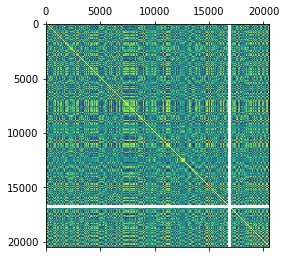

In [14]:
plt.matshow(magic.corr())
plt.show()

In [0]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [0]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(all_genes, all_genes.iloc[:,0])

In [74]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(all_genes.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))

         Specs         Score
15871    SFTPC  3.713242e+08
8290      IGF2  3.652969e+08
4975      DLK1  2.790815e+08
15869   SFTPA2  2.481916e+08
4521   CYP17A1  1.585480e+08
15868   SFTPA1  1.362489e+08
17332     STAR  1.101500e+08
15870    SFTPB  9.811335e+07
4527   CYP21A2  6.461434e+07
9226      KRT5  5.831231e+07


From here we see that all the scores of significance are pretty small, but SFTPC, IGF2, DLK1, SFTPA2, and CYP17A1 are among those that are heavily involved. The next following text passages will record the importance of each of these genes.

SFTPC is surfactant protein C and it's responsible for maintaining the stability of pulmonary tissue by reducing the surface tension of fluids that coat the lung and is essential to lung function as according to the NCBI.

IGF2 is insulin like growth factor 2. It's a member of the insulin family of polypeptide growth factors and it affects growth and development. Mostly associated with the placenta.

DLK1 is delta like non-canonical Notch ligand 1. It encodes transmembrane proteins that have growth factors that regulate cell growth. Located in chromosome 14 and frequently shows uniparental disomy. Associated with placenta and adrenal.

SFTPA2 is surfactant protein A2. Apart of the pulmonary-surfactant associated proteins (SFTPA) on chromosome 10, mutations in this gene are associated with idiopathic pulmonary fibrosis (lung scarring).

CYP17A1 is cytochrome P450 family 17 subfamily A member 1. This gene encodes a member of the cytochrome P450 superfamily of enzymes. It catalyzes many reactions involved in drug metabolism and creation of cholesterol, steroids and other lipids.

The final one is KRT5 which is keratin 5 which seems interesting. It's associated with the esophagus and skin.

I'll try to visualize these genes together.

In [0]:
corrmat = magic.corr()

In [79]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [80]:
#top_corr_features = corrmat.index
#top_corr_features

Index(['Unnamed: 0', 'A1BG', 'A1CF', 'A2BP1', 'A2LD1', 'A2ML1', 'A2M',
       'A4GALT', 'A4GNT', 'AAA1',
       ...
       'ZXDA', 'ZXDB', 'ZXDC', 'ZYG11A', 'ZYG11B', 'ZYX', 'ZZEF1', 'ZZZ3',
       'psiTPTE22', 'tAKR'],
      dtype='object', length=20502)

In [0]:
plt.figure(figsize=(20,20))
#g=sns.heatmap(magic[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [0]:
#plt.scatter(X_magic['A1BG'], X_magic['A1CF'], c=X_magic['A2ML1'], s=1, cmap='inferno')
#plt.show()
#magic.plot.animate_magic(train_set1, gene_x='A1BG', gene_y='A1CF', gene_color='A2ML1', operator=magic_operator)